# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `6` | `Questions`

> Hi, Team 👋

> The purpose of the current exercise problem sets is to consolidate and expand the understanding of algorithmic trading tool kits that you have developed in the course.

> Building on what you have learned thus far, these problem sets will ask you to create trading strategies, capitalizing on commonly used technical indicators.

> Please submit your answers via the submission portal at eLearn. Again, it would be a good practice to attempt to answer these questions within the designated time limit.

> As with the previous exercise problem sets, the questions are written in such a way that helps advance your learning, rather than testing you.

> Enjoy🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [3]:
(
    yf
    .pdr_override()
)
import matplotlib.gridspec as gridspec
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

## 👇 Questions 1 to 4 ask you to build, execute, and backtest a strategy based on one kind of momentum strategy called the `Moving Average Convergence Divergence` (MACD) crossover.

### <font color = blue> 👉 Question 1</font>. Let’s take a look at Apple (AAPL) as our security of interest, over the three-year period of 2015 through 2017.

#### Moving Average Convergence Divergence (`MACD`) is a lagging, trend-following momentum indicator reflecting the relationship between two moving averages of stock prices.

#### The strategy utilizes two indicators, the MACD and the MACD signal line:

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.

### <font color = green> NOTE: The MACD crossover strategy is defined as:

- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [4]:
# start means actual signal generation
start = "2015-01-01"
end = "2018-01-01"
tickers = ['AAPL', 'MSFT', 'AMZN', 'UAL', 'DAL', 'XOM', 'CVX']

In [5]:
def clean_data(list_of_df):
    for df in list_of_df:
        df.dropna(axis=0, inplace=True)
    return
def download_data(list_of_tickers, start, end):
    data = []
    for ticker in list_of_tickers:
        data += [
                (yf
                .download(ticker,
                        start,
                        end,
                        auto_adjust = True))]
    clean_data(data)    
    return data

In [6]:
data = download_data(tickers, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
data[0]

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,24.960290,24.971495,24.055006,24.498686,212818400
2015-01-05,24.265635,24.346304,23.620285,23.808512,257142000
2015-01-06,23.873497,24.072928,23.445503,23.810755,263188400
2015-01-07,24.021391,24.245472,23.909351,24.144636,160423600
2015-01-08,24.476278,25.130592,24.357514,25.072330,237458000
...,...,...,...,...,...
2017-12-22,41.349370,41.524540,41.306763,41.427486,65397600
2017-12-26,40.430924,40.589522,40.165800,40.376480,132742000
2017-12-27,40.265222,40.426186,40.172903,40.383579,85992800


In [8]:
def sig_MACD(stock, nshort=12, nlong=26, nsig=9):
    outcome = stock[['Close']]
    
    # Calculate the short-term Exponential Moving Average (EMA)
    outcome['short_ema'] = outcome['Close'].ewm(span=nshort, min_periods=1,
                                                adjust=False).mean()

    # Calculate the long-term Exponential Moving Average (EMA)
    outcome['long_ema'] = outcome['Close'].ewm(span=nlong, min_periods=1,
                                               adjust=False).mean()

    # Calculate the MACD line
    outcome['MACD_line'] = outcome['short_ema'] - outcome['long_ema']

    # Calculate the signal line
    outcome['MACD_sig'] = outcome['MACD_line'].ewm(span=nsig, min_periods=1,
                                                   adjust=False).mean()

    # Calculate the MACD histogram
    outcome['hist'] = outcome['MACD_line'] - outcome['MACD_sig'] 
    
    
    outcome["position"] = \
    (
        # whenever the signal line cross over MACD line
        np
        .where\
        ((outcome["MACD_sig"] > outcome["MACD_line"]), -1, 1)        
    )
    # as MACD only available after market closes with a 'Close' Price
    # Thus position only opened on next market day
    outcome["position"] = outcome["position"].shift(1)
    
    # it takes at least long window number of days to get correct signal
    # before that all position shall be set to 0
    outcome["position"][:nlong] = 0
    # here I blank out first, but real life data shall be enough
    # to generate MACD on '2015-01-01'.
    
    outcome["position"].fillna(0, inplace = True)
    outcome["B_S"] = outcome["position"].diff()
    
    # sign the strategy as far as I understand is utilising 100% capital,
    # Buy and Sell does not contain size information here. The sign is enough
    outcome["B_S"] = np.sign(outcome["B_S"])
    
    outcome["B_S"].fillna(0, inplace=True)
    
    return outcome    

In [9]:
AAPL_MACD = sig_MACD(data[0])
AAPL_MACD

,Close,short_ema,long_ema,MACD_line,MACD_sig,hist,position,B_S
Date,,,,,,,,
2015-01-02,24.498686,24.498686,24.498686,0.000000,0.000000,0.000000,0.0,0.0
2015-01-05,23.808512,24.392505,24.447562,-0.055057,-0.011011,-0.044045,0.0,0.0
2015-01-06,23.810755,24.303005,24.400391,-0.097386,-0.028286,-0.069100,0.0,0.0
2015-01-07,24.144636,24.278641,24.381446,-0.102805,-0.043190,-0.059615,0.0,0.0
2015-01-08,25.072330,24.400747,24.432623,-0.031876,-0.040927,0.009051,0.0,0.0
...,...,...,...,...,...,...,...,...
2017-12-22,41.427486,41.087595,40.708551,0.379044,0.348635,0.030409,1.0,0.0
2017-12-26,40.376480,40.978192,40.683953,0.294240,0.337756,-0.043516,1.0,0.0
2017-12-27,40.383579,40.886713,40.661703,0.225011,0.315207,-0.090196,-1.0,-1.0


In [10]:
def view_sig(signals):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(30, 20))

    # Plot the 'Close' price
    ax.plot(signals.index, signals['Close'], label='Price',
            linestyle='-', color='blue')

    # Plot buy positions with 'g^' format
    buy_positions = signals[signals['B_S'] > 0]
    ax.scatter(buy_positions.index, buy_positions['Close'],
               label='Buy', color='green', marker='^', s=100)

    # Plot sell positions with 'rv' format
    sell_positions = signals[signals['B_S'] < 0]
    ax.scatter(sell_positions.index, sell_positions['Close'],
               label='Sell Positions', color='red',
               marker='v', s=100)

    # Customize labels, title, and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    ax.set_title('Buy and Sell Actions')
    ax.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

    return

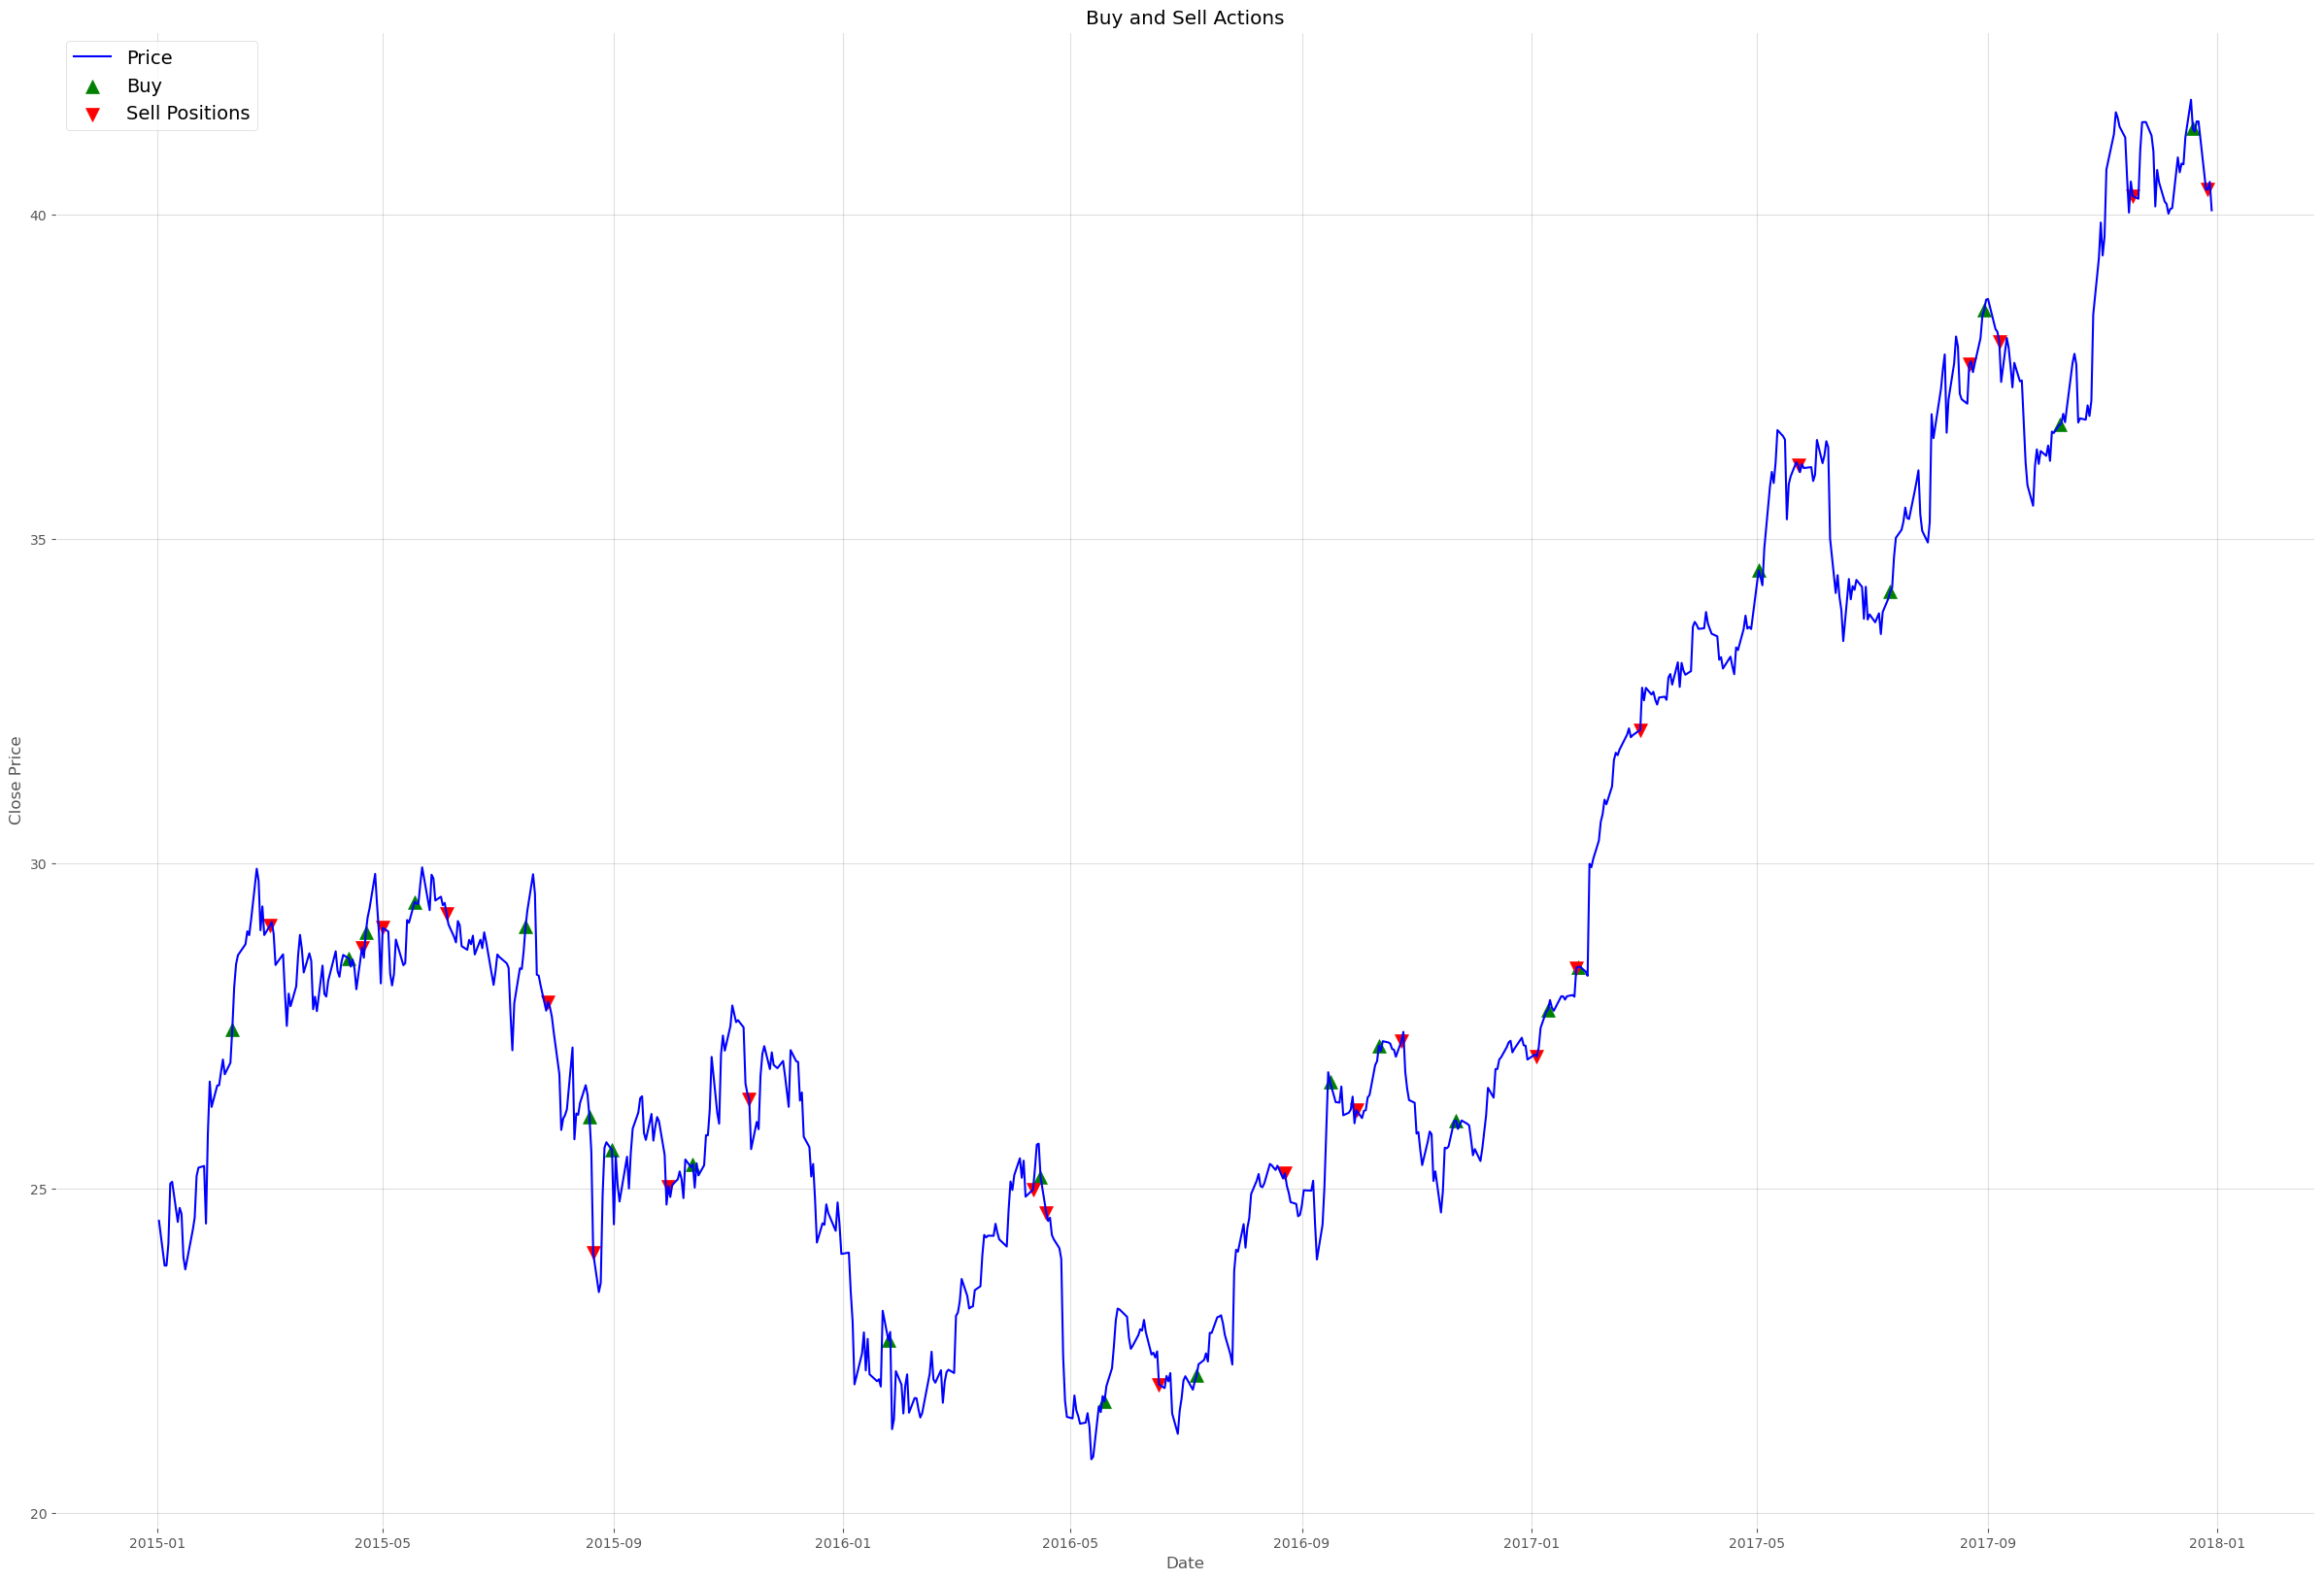

In [11]:
view_sig(AAPL_MACD)

In [12]:
def view_MACD_sig(signals, stock_ticker):
    # Create a figure with GridSpec specifying subplot heights
    fig = plt.figure(figsize=(30, 20))  
    # Create a figure with a total height of 14 inches
    gs = gridspec.GridSpec(2, 1, height_ratios=[30, 8])  
    # Create a 2x1 grid with specified height ratios

    # Create subplots within the grid
    ax1 = plt.subplot(gs[0])  
    # The first subplot (ax1) with a height ratio of 10
    ax2 = plt.subplot(gs[1], sharex=ax1)  
    # The second subplot (ax2) with a height ratio of 4 and shared x-axis

    # Plot the closing price on the first subplot (ax1)
    ax1.plot(signals.index, signals['Close'], label='Close Price', color='blue')
    ax1.set_ylabel('Close Price')
    ax1.set_title(f'{stock_ticker} Price and trade signals with MACD')
    
    # Plot buy positions with 'g^' format
    buy_positions = signals[signals['B_S'] > 0]
    ax1.scatter(buy_positions.index, buy_positions['Close'],
               label='Buy', color='green', marker='^', s=100)

    # Plot sell positions with 'rv' format
    sell_positions = signals[signals['B_S'] < 0]
    ax1.scatter(sell_positions.index, sell_positions['Close'],
               label='Sell Positions', color='red',
               marker='v', s=100)

    # Plot the MACD and signal lines on the second subplot (ax2)
    ax2.plot(signals.index, signals['MACD_line'], label='MACD Line', color='red')
    ax2.plot(signals.index, signals['MACD_sig'], label='Signal Line', color='green')
    ax2.bar(signals.index, signals['hist'], label='MACD Histogram', color='gray')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('MACD')
    ax2.legend()

    # Display the plot
    plt.show()
    return

### <font color = red> Answer 1 is presented in the cell below: </font>

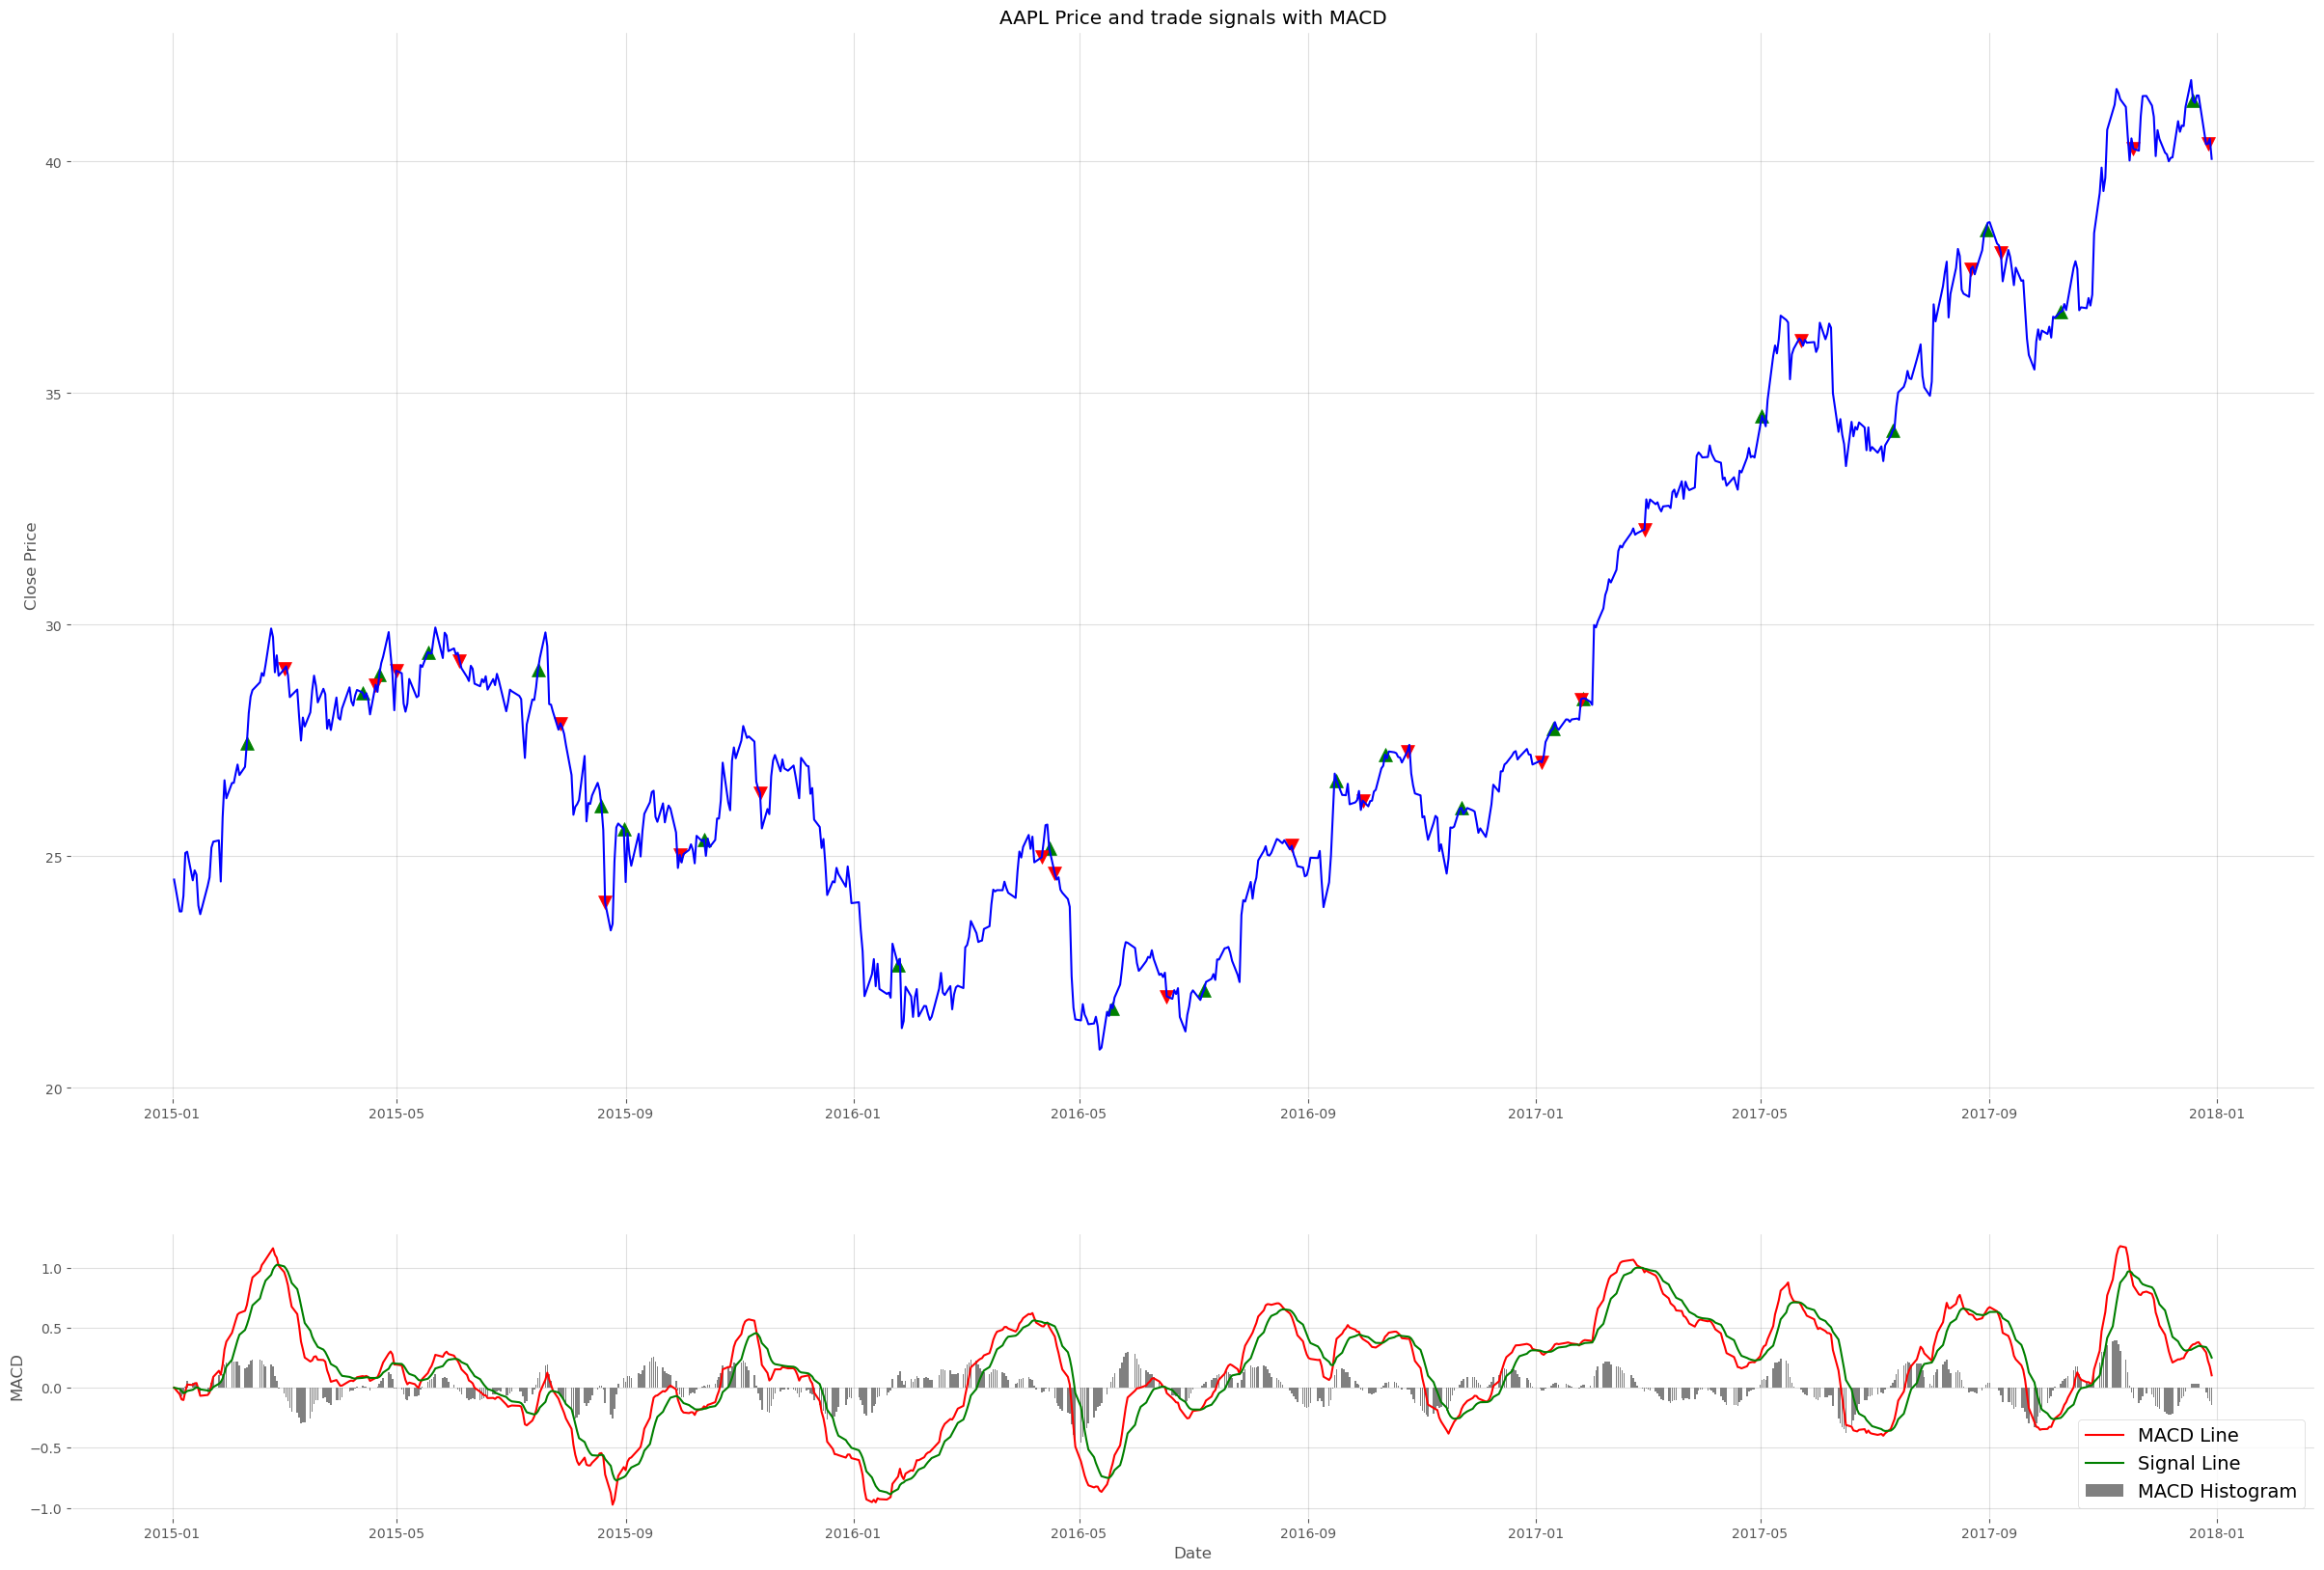

In [13]:
view_MACD_sig(AAPL_MACD, tickers[0])

### <font color = blue> 👉 Question 2</font>. Let’s suppose that you started from a $100,000 capital base for the given security.

### Given a $5 fixed commission fee per trade, how much in cumulative returns could you have had as a result of the MACD crossover strategy?

### Below are the lines of code that lead to an answer:

#### Sharpe Ratio

$$
\begin{equation}
\text{Sharpe Ratio} = \frac{\text{Expected Portfolio Return} - \text{Risk-Free Rate}}{\text{Portfolio Standard Deviation}}
\end{equation}
$$

$$
\begin{equation}
\text{Sharpe Ratio} = \sqrt{253} \times \frac{\text{Average Daily Return}}{\text{Daily Standard Deviation}}
\end{equation}
$$

In [14]:
def cal_Sharpe(signals, capital, fee=0):
    portfolio =\
    (
    pd
    .DataFrame(index = signals.index)
    .fillna(0.0)
    )
    # record down the change ratio in underlying asset, the first row as 0
    portfolio['Asset_Rtn'] = signals["Close"] / signals['Close'].shift(1) - 1
    portfolio['Asset_Rtn'].fillna(0, inplace=True)
    # record down if the change ratio affecting the portfolio value, the first row as 0
    portfolio['Holding'] = signals['position']                                               
    # use the actual holding direction to adjust on the sign of asset change ratio
    portfolio['Adj_Rtn'] = portfolio['Asset_Rtn']*portfolio['Holding']
    # fill in the actual total value based on trading activities
    portfolio['total'] = np.NaN
    temp_value = capital
    for idx in portfolio.index:
        # the commission fee is always to reduce the portfolio value
        temp_value = (1 + portfolio.loc[idx]['Adj_Rtn']) *\
                            (temp_value - fee * abs(signals.loc[idx]['B_S']))
        portfolio.loc[idx, 'total'] = temp_value 

    portfolio["returns"] =\
    (    portfolio["total"]
        .pct_change()
    )
    portfolio["returns"].fillna(0, inplace=True)
    
    Sharpe =\
    (
    np.sqrt(253) * (portfolio["returns"].mean() /\
                    portfolio["returns"].std()
                    )
    )

    CAGR =\
    (
        (
            (portfolio["total"][-1]) / capital
        )
            **(365.0/((signals.index[-1] -\
                       signals.index[0]).days) 
        ) 
        - 1
    )

    return [portfolio, Sharpe, CAGR]

In [15]:
start_capital = 1e5
commission = 5

In [16]:
AAPL_MACD_result = cal_Sharpe(AAPL_MACD, start_capital, commission)
AAPL_MACD_result[0]

,Asset_Rtn,Holding,Adj_Rtn,total,returns
Date,,,,,
2015-01-02,0.000000,0.0,0.000000,100000.000000,0.000000
2015-01-05,-0.028172,0.0,-0.000000,100000.000000,0.000000
2015-01-06,0.000094,0.0,0.000000,100000.000000,0.000000
2015-01-07,0.014022,0.0,0.000000,100000.000000,0.000000
2015-01-08,0.038422,0.0,0.000000,100000.000000,0.000000
...,...,...,...,...,...
2017-12-22,0.000000,1.0,0.000000,188313.226853,0.000000
2017-12-26,-0.025370,1.0,-0.025370,183535.761259,-0.025370
2017-12-27,0.000176,-1.0,-0.000176,183498.492158,-0.000203


In [17]:
# if don't blank out first long window signals, the result seems to be -48.47%
AAPL_MACD_result[0]['total'][-1] / start_capital-1

0.8496088625099143

### <font color = red> Answer 2 </font>

    The answer is ___84.96____ % .

### <font color = blue> 👉 Question 3</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [18]:
def cal_MDD(performs):
    MDD = \
    (
    pd
    .DataFrame(index = performs.index)
    .fillna(0.0)
    )
    
    MDD['Max'] = performs["total"].cummax()
    MDD['Drawdown'] = performs["total"] - MDD['Max']
    MDD['DD%'] = MDD['Drawdown'] / MDD['Max'] * 100
    
    MDD = MDD.dropna()
    
    MDD['DD_Flag'] = 0
    DD = []
    flag = 0
    nDD = 1
    
    for idx in MDD.index:
        if MDD.loc[idx]['Drawdown'] == 0:
            # flag is to rememeber if in DrawDown period
            if flag == 0:
                continue
            else:
                # a DD period is just ended
                # clear flag, ready for next DD seriel number
                flag = 0
                nDD += 1
        # if Drawdown < 0, entering a DD period
        else:
            flag = 1
            MDD.loc[idx, 'DD_Flag'] = nDD
            
    grouped = MDD[MDD['DD_Flag'] != 0].groupby('DD_Flag')
    index_values = performs

    for flags, group in grouped:
        
        s_date = group.index.min()
        e_date = group.index.max()
        # like how we opened position on the next day, close is also shifted
        if len(MDD[e_date:].index) > 1:
            e_date = MDD[e_date:].index[1]
 
        
        days = (e_date.to_pydatetime() - s_date.to_pydatetime()).days
        loss = group['Drawdown'].min()
        loss_pct = group['DD%'].min()

        DD += [[flags, s_date, e_date, days, loss, loss_pct]]
    DD = pd.DataFrame(DD)
    column_names = ['S/N', 'DD_start', 'DD_end', 'Days', 'DD_Max', 'DD%']
    
    DD.columns = column_names
    return [MDD, DD]

In [19]:
AAPL_MACD_DD = cal_MDD(AAPL_MACD_result[0])
AAPL_MACD_DD[1]

,S/N,DD_start,DD_end,Days,DD_Max,DD%
0,1,2015-02-19,2015-02-20,1,-225.511660,-0.209755
1,2,2015-02-24,2015-03-11,15,-4546.471637,-4.092711
2,3,2015-03-12,2016-01-07,301,-21261.135955,-18.878201
3,4,2016-01-08,2016-03-22,74,-14791.484690,-12.851424
4,5,2016-03-23,2016-03-29,6,-1651.686611,-1.433675
5,6,2016-03-31,2016-04-01,1,-615.339866,-0.520274
6,7,2016-04-05,2016-04-27,22,-8590.484544,-7.161340
7,8,2016-05-03,2016-05-06,3,-2136.250022,-1.644576
8,9,2016-05-09,2016-05-11,2,-982.653389,-0.753938
9,10,2016-05-13,2016-05-25,12,-6651.552698,-4.975829


In [20]:
def view_MDD(porfolio, ticker_str):
    fig = plt.figure(figsize = [16, 8])

    porfolio[0]['total'].plot(color = "blue",
                        lw = 0.80,
                        label = "Max")
    porfolio[0]['total'].cummax().plot(color = "blue",
                        linestyle='--',                
                        lw = 0.80)                               

    # Add a legend
    plt.legend()
    # Set the y-label and plot title
    plt.ylabel('portfolio value')
    plt.title(ticker_str)

    plt.show()       

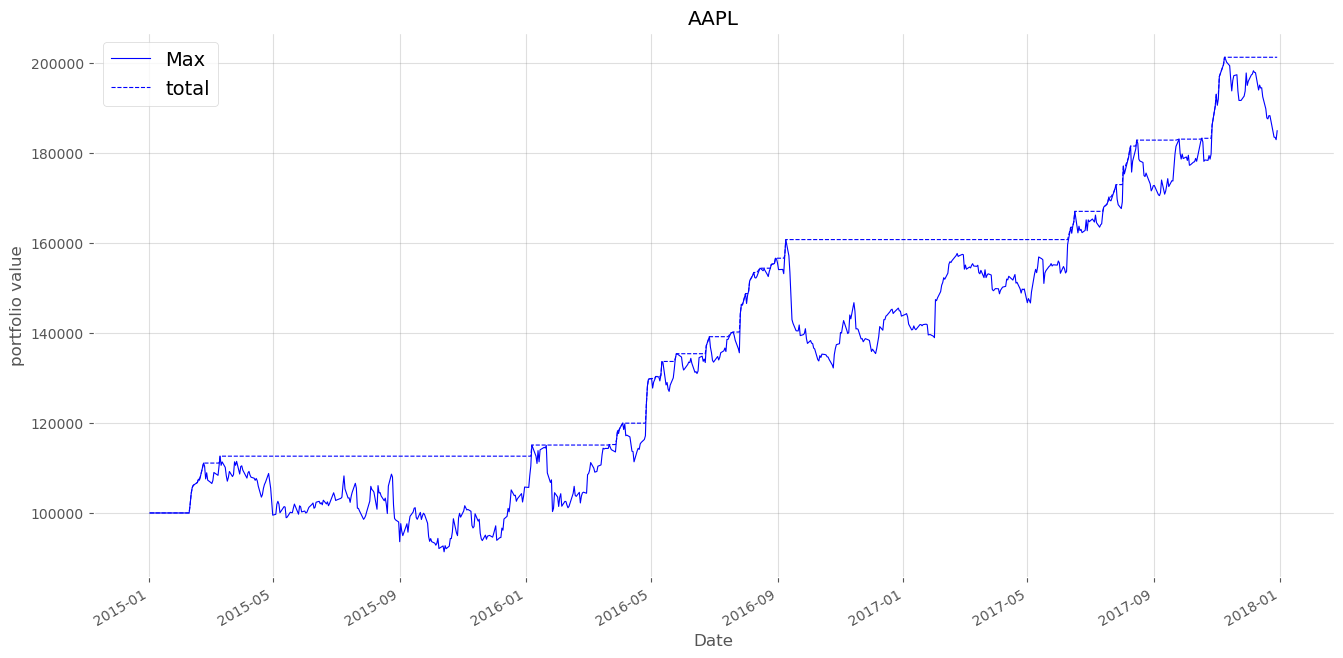

In [21]:
view_MDD(AAPL_MACD_result, 'AAPL')

In [22]:
AAPL_DD_rank = AAPL_MACD_DD[1].sort_values(by='DD%')
AAPL_DD_rank.index = range(1, len(AAPL_DD_rank) + 1)
AAPL_DD_rank

,S/N,DD_start,DD_end,Days,DD_Max,DD%
1,3,2015-03-12,2016-01-07,301,-21261.135955,-18.878201
2,19,2016-09-12,2017-06-12,273,-28535.671067,-17.749429
3,4,2016-01-08,2016-03-22,74,-14791.484690,-12.851424
4,30,2017-11-09,2017-12-29,50,-18319.196951,-9.100383
5,7,2016-04-05,2016-04-27,22,-8590.484544,-7.161340
6,26,2017-08-16,2017-09-25,40,-12339.306233,-6.747114
7,10,2016-05-13,2016-05-25,12,-6651.552698,-4.975829
8,2,2015-02-24,2015-03-11,15,-4546.471637,-4.092711
9,12,2016-06-28,2016-07-18,20,-5658.937316,-4.065810
10,13,2016-07-21,2016-07-27,6,-4615.116996,-3.291320


### <font color = red> Answer 3 </font>

    The Worst drawdown period     : Net drawdown ___-18.88____ % | Duration ____301___ Days
    
    The 2nd worst drawdown period : Net drawdown ____-17.75____ % | Duration ____273_____ Days
     
    The 3rd worst drawdown period : Net drawdown ____-12.85____ % | Duration ____74______ Days
         
    The 4th worst drawdown period : Net drawdown _____-9.10___ % | Duration ____50______ Days
    
    The 5th worst drawdown period : Net drawdown _____-7.16____ % | Duration _____22_____ Days

### <font color = blue> 👉 Question 4</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [23]:
year1 = AAPL_MACD_result[0].loc['2015-01-01':'2016-01-01']
year2 = AAPL_MACD_result[0].loc['2016-01-01':'2017-01-01']
year3 = AAPL_MACD_result[0].loc['2017-01-01':'2018-01-01']

In [24]:
((year1['total'][-1]/year1['total'][0]-1)*100,
(year2['total'][-1]/year1['total'][0]-1)*100,
(year3['total'][-1]/year1['total'][0]-1)*100)

(5.757964302047469, 43.753093622565586, 84.96088625099144)

##### <font color = red> Answer 4 </font>

    Below average year(s) : __2015______ 
    
    Above average year(s) : __2016, 2017______ 
     

###  <font color = blue> 👉 Question 5. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [52]:
AAPL_MACD_result[1]

1.0449777250625856

### <font color = red> Answer 5 </font>
    
    Sharpe ratio: ___1.045%___
    

## 👇 Questions 6 to 10 ask you to answer the above questions using your `customized functions` to `scale up`.

### Below you will find the above questions repeated, but this time you need to compare the results across the following six stocks:

### `MSFT`

### `AMZN`

### `UAL`

### `DAL`

### `XOM`

### `CVX`

### <font color = green> NOTE: When answering the questions below, please hold all the conditions (i.e., investment horizon; capital base; deployment of `MACD crossover strategy`; the flat commission fee, etc.) constant, as you did above. 
    
### <font color = green> That is, the `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade. Given the iterative nature of the questions below, writing and using your customized functions will be helpful as you answer the questions.

###  <font color = blue> 👉 Question 6. </font>  Please visualize buy and sell positions for each of the six stocks. 

### Below are the lines of code that lead to an answer:

In [26]:
def sig_MACD_batch(list_of_stock, nshort=12, nlong=26, nsig=9):
    MACD_batch = []
    for stock in list_of_stock:
        MACD_batch += [(sig_MACD(stock, nshort, nlong, nsig))]
    return MACD_batch    

In [27]:
# tickers = ['AAPL', 'MSFT', 'AMZN', 'UAL', 'DAL', 'XOM', 'CVX']
MACD_batch_sig = sig_MACD_batch(data[:])
MACD_batch_sig[0]
# may choose to trim off the first 'AAPL' out of the question
# it is used to conter check on the result, against previous analysis

,Close,short_ema,long_ema,MACD_line,MACD_sig,hist,position,B_S
Date,,,,,,,,
2015-01-02,24.498686,24.498686,24.498686,0.000000,0.000000,0.000000,0.0,0.0
2015-01-05,23.808512,24.392505,24.447562,-0.055057,-0.011011,-0.044045,0.0,0.0
2015-01-06,23.810755,24.303005,24.400391,-0.097386,-0.028286,-0.069100,0.0,0.0
2015-01-07,24.144636,24.278641,24.381446,-0.102805,-0.043190,-0.059615,0.0,0.0
2015-01-08,25.072330,24.400747,24.432623,-0.031876,-0.040927,0.009051,0.0,0.0
...,...,...,...,...,...,...,...,...
2017-12-22,41.427486,41.087595,40.708551,0.379044,0.348635,0.030409,1.0,0.0
2017-12-26,40.376480,40.978192,40.683953,0.294240,0.337756,-0.043516,1.0,0.0
2017-12-27,40.383579,40.886713,40.661703,0.225011,0.315207,-0.090196,-1.0,-1.0


### <font color = red> Answer 6 is presented in the cell below: </font>

In [30]:
def view_MACD_batch(list_of_signals, list_of_ticker):
    for idx in range(len(list_of_signals)):
        view_MACD_sig(list_of_signals[idx], list_of_ticker[idx])
    return

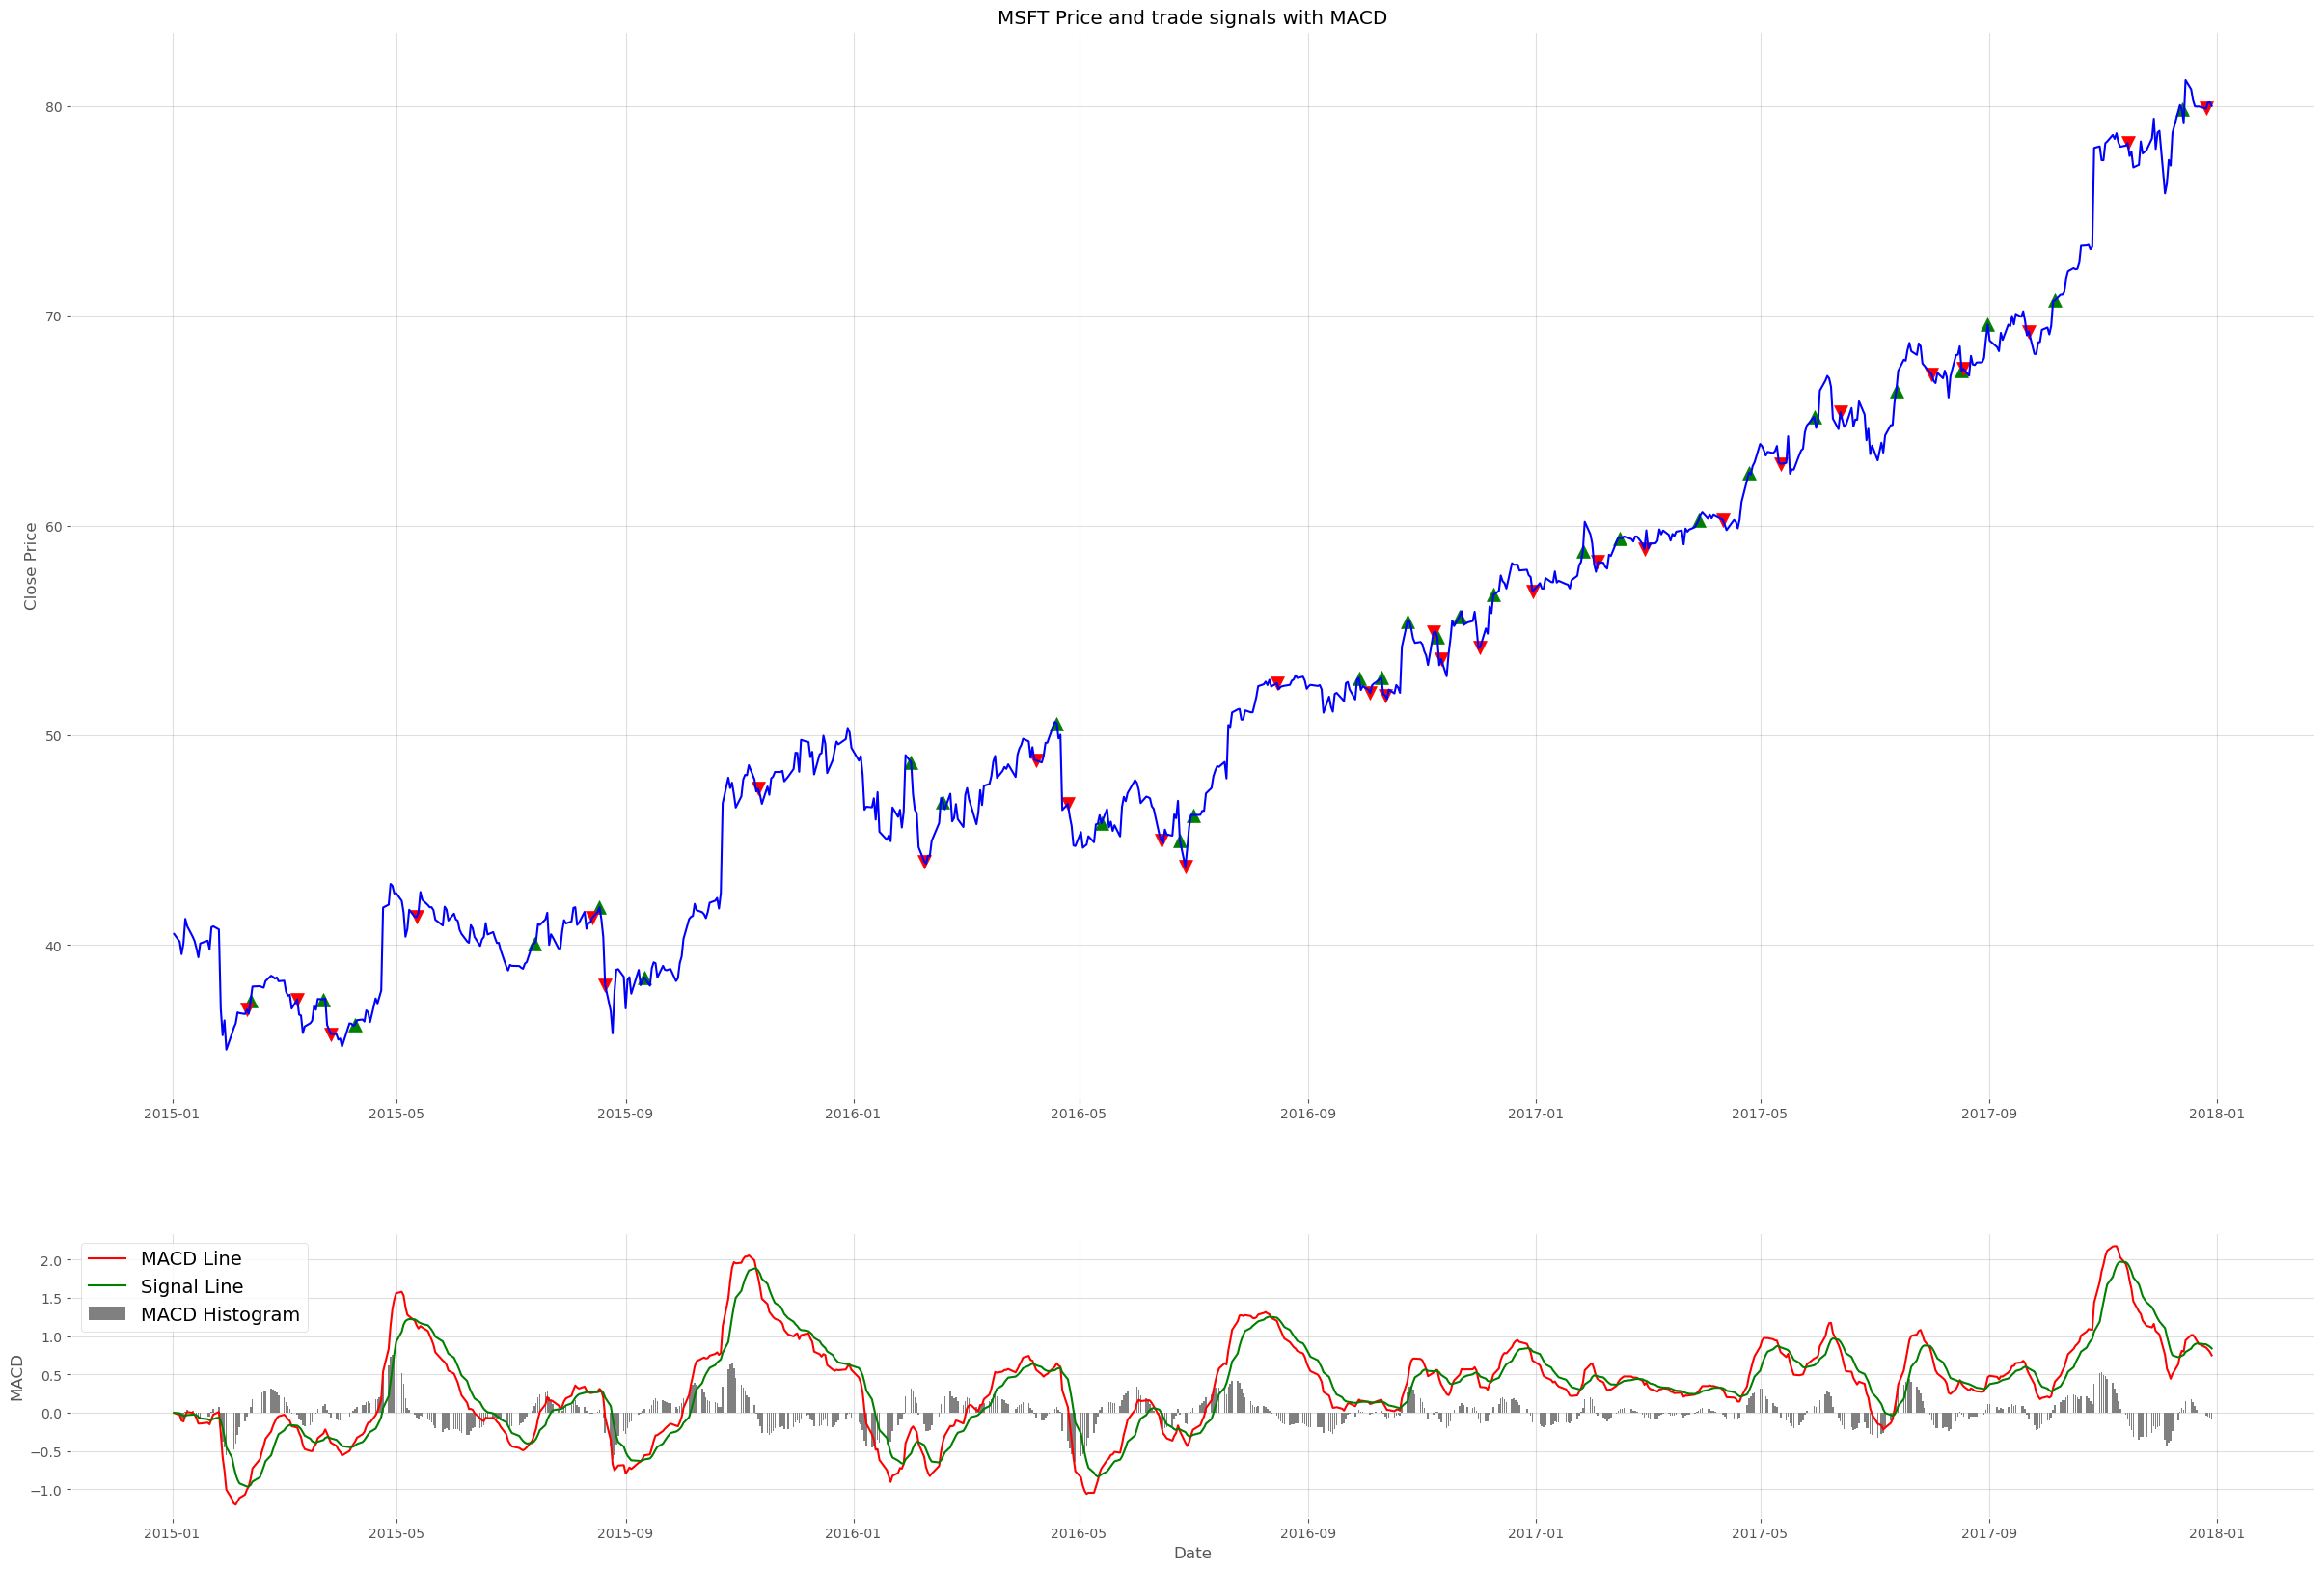

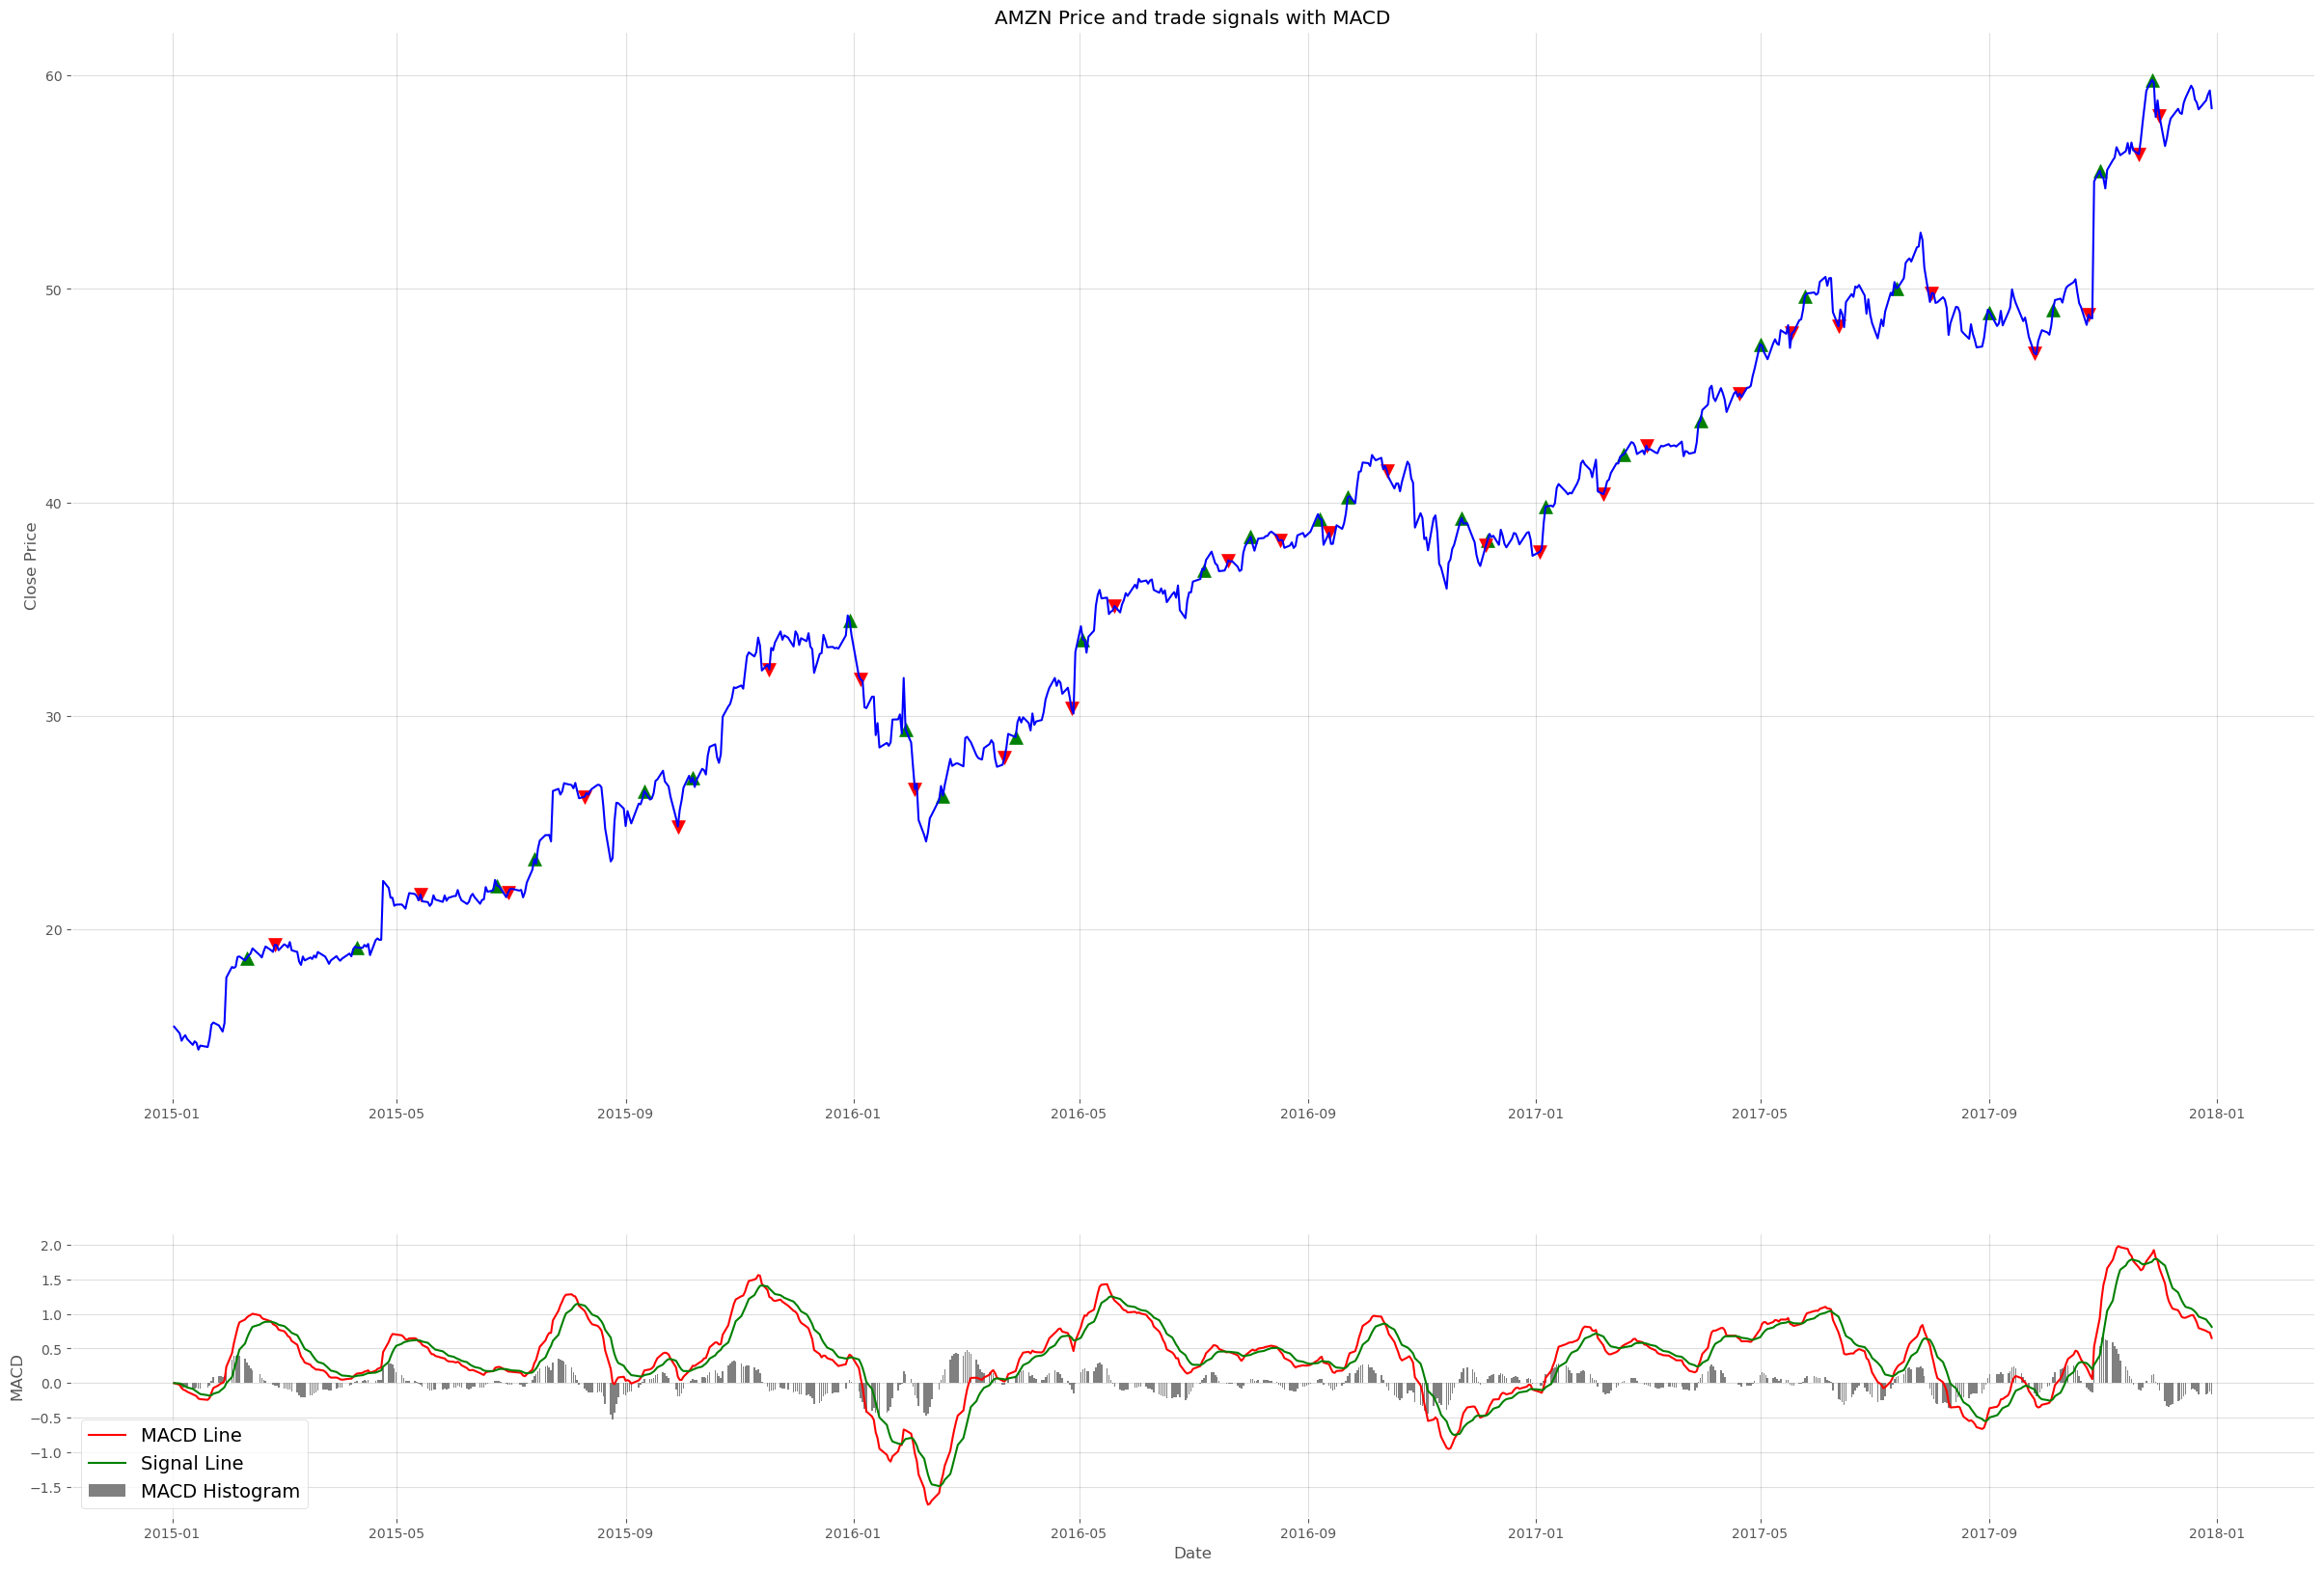

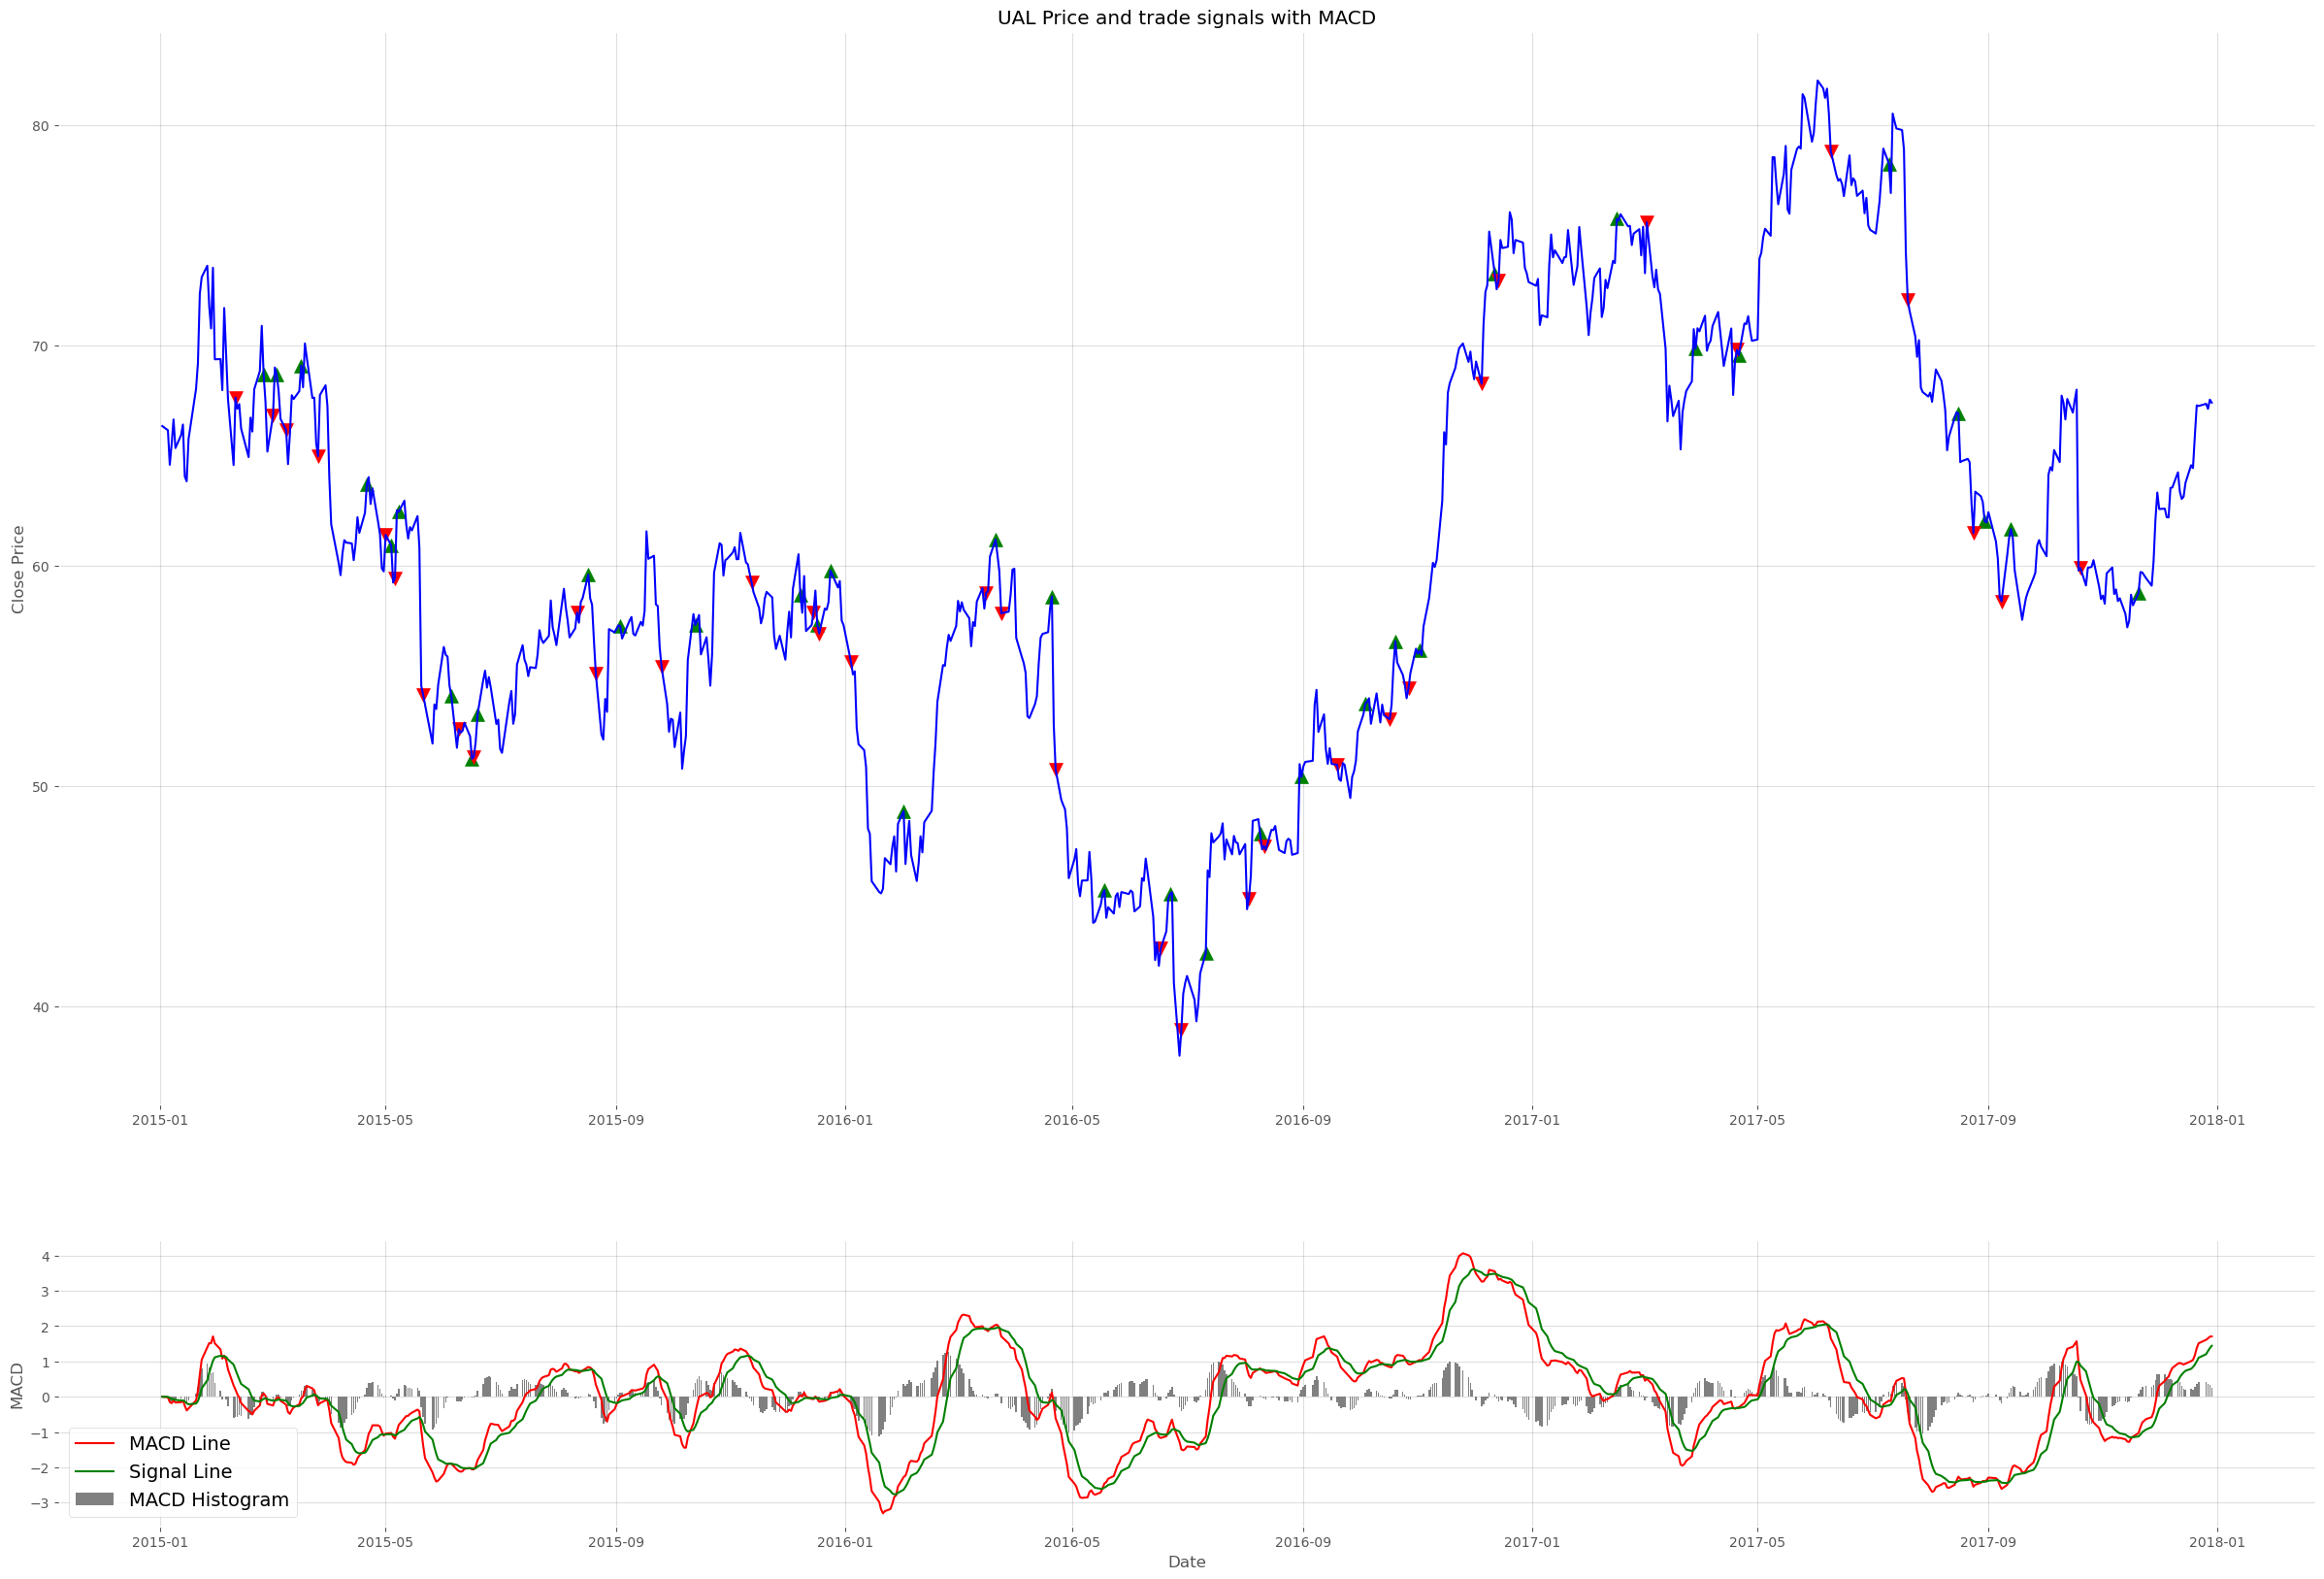

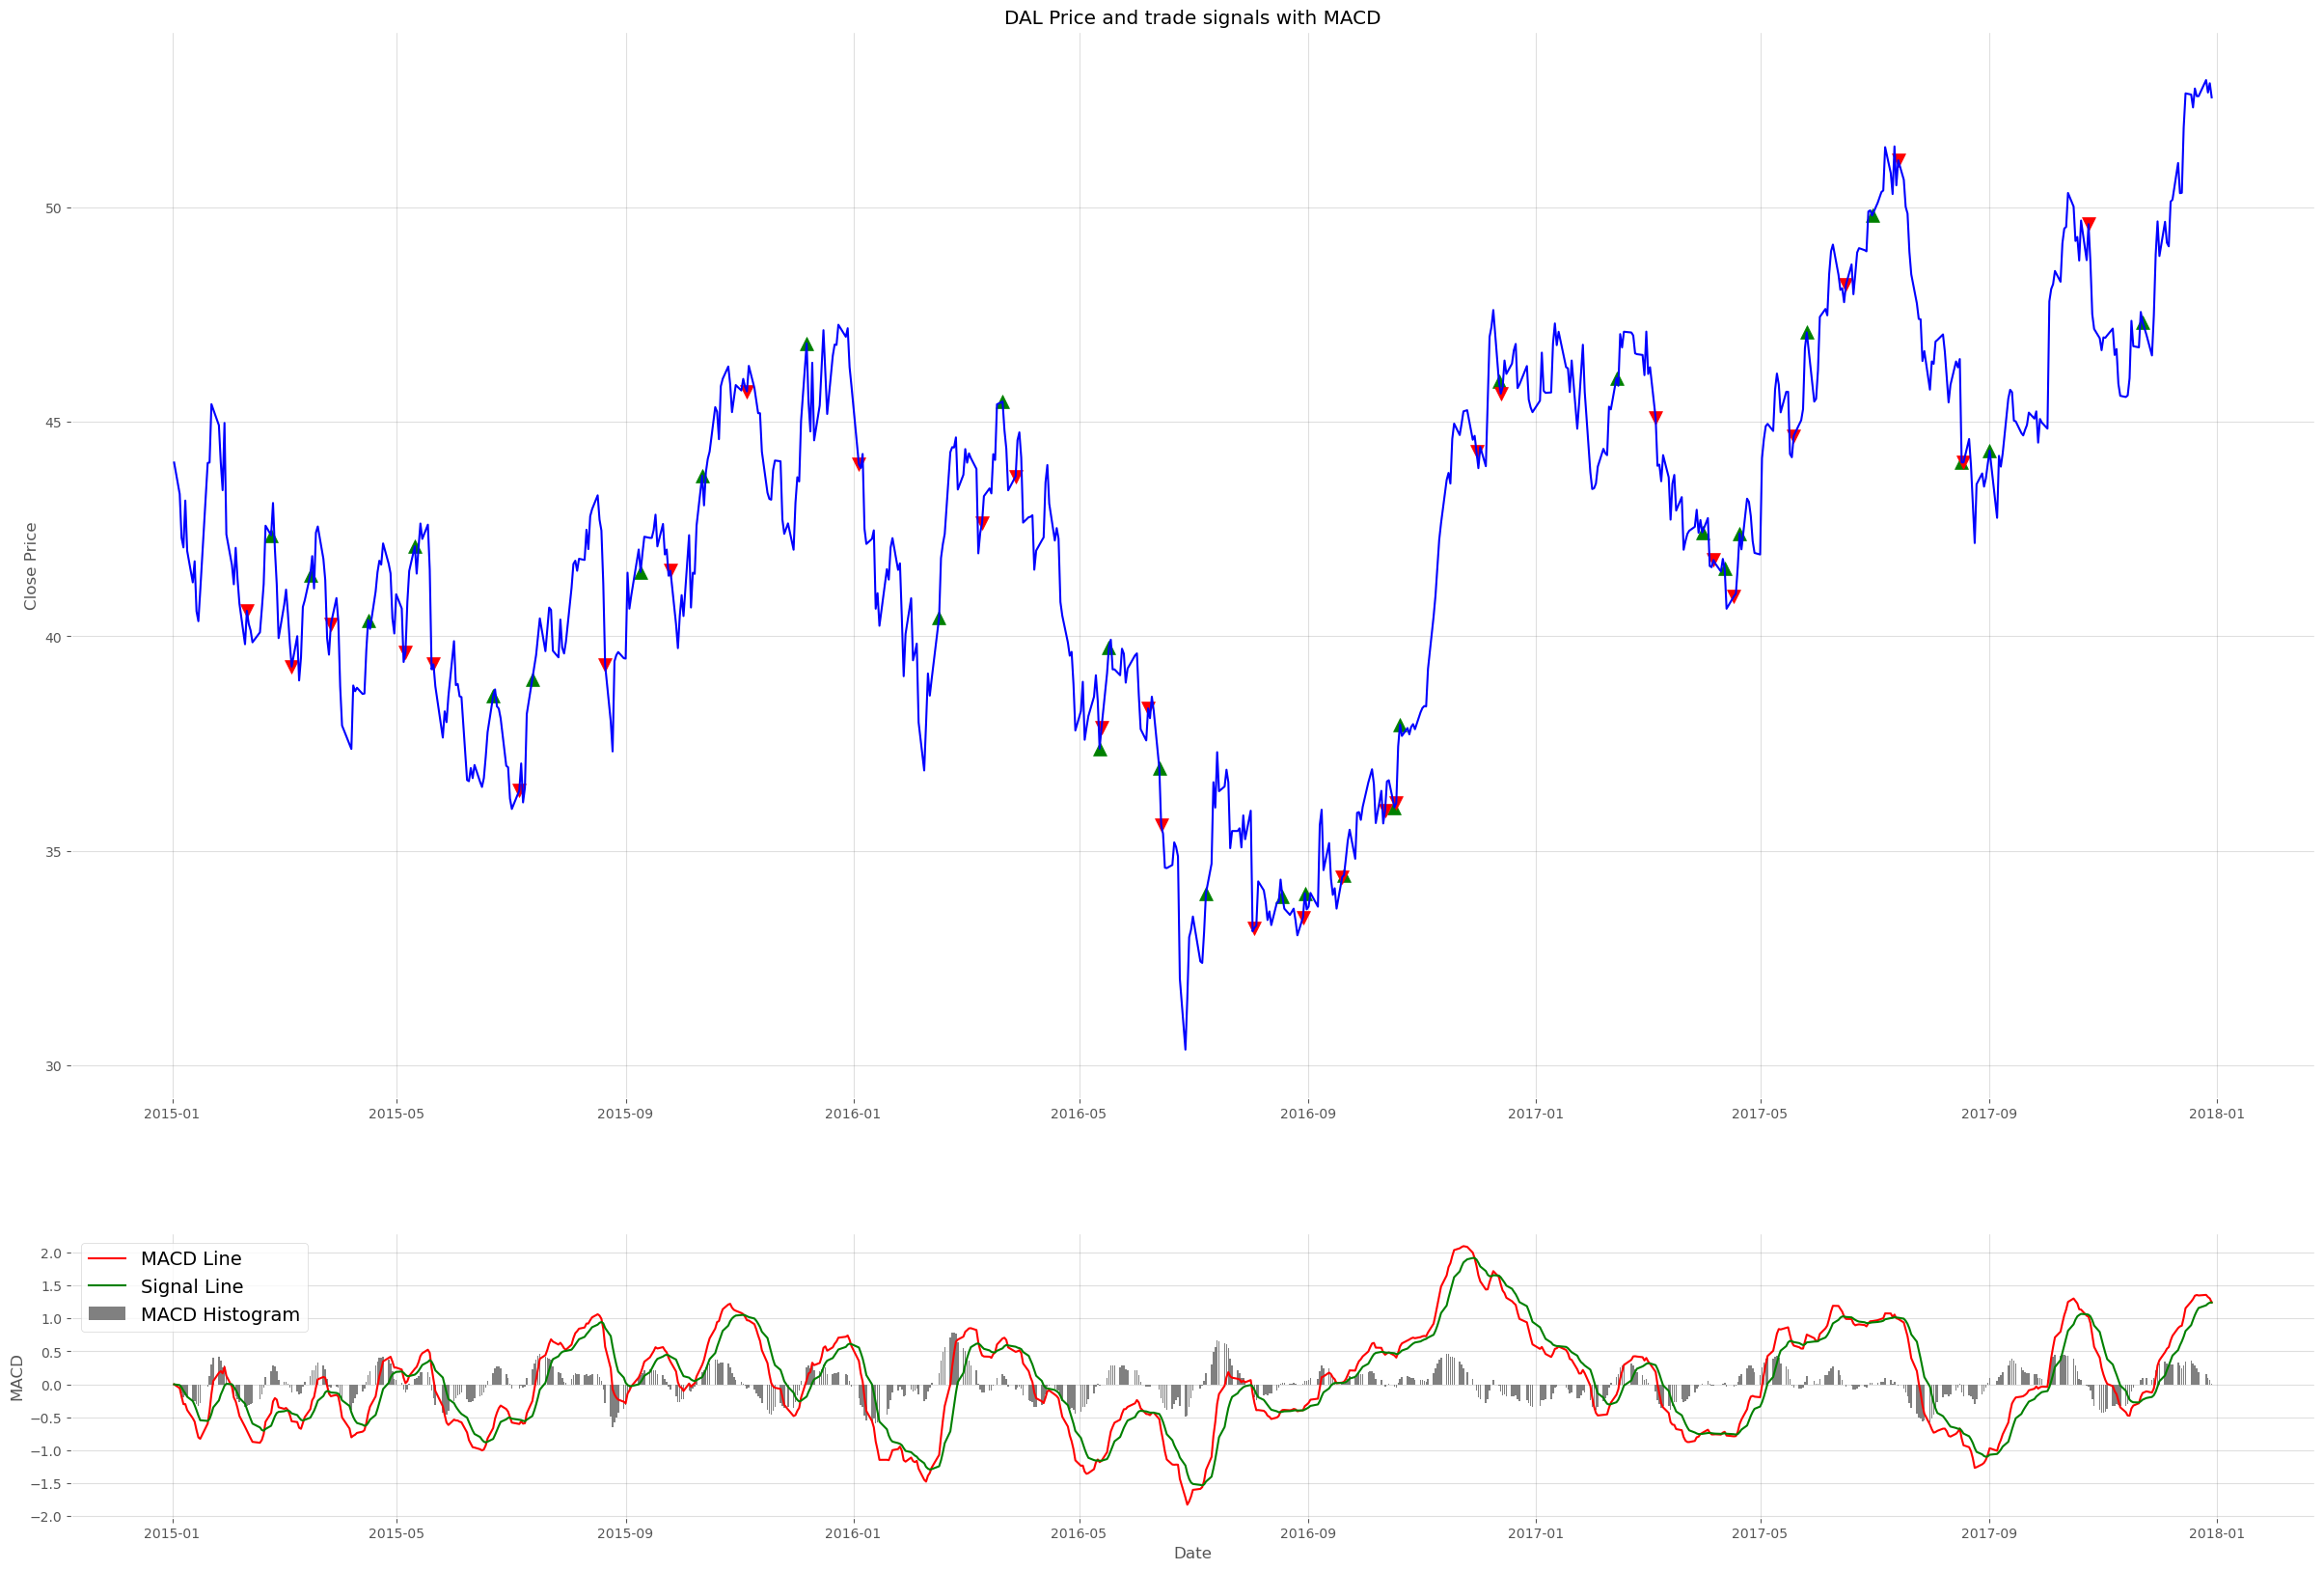

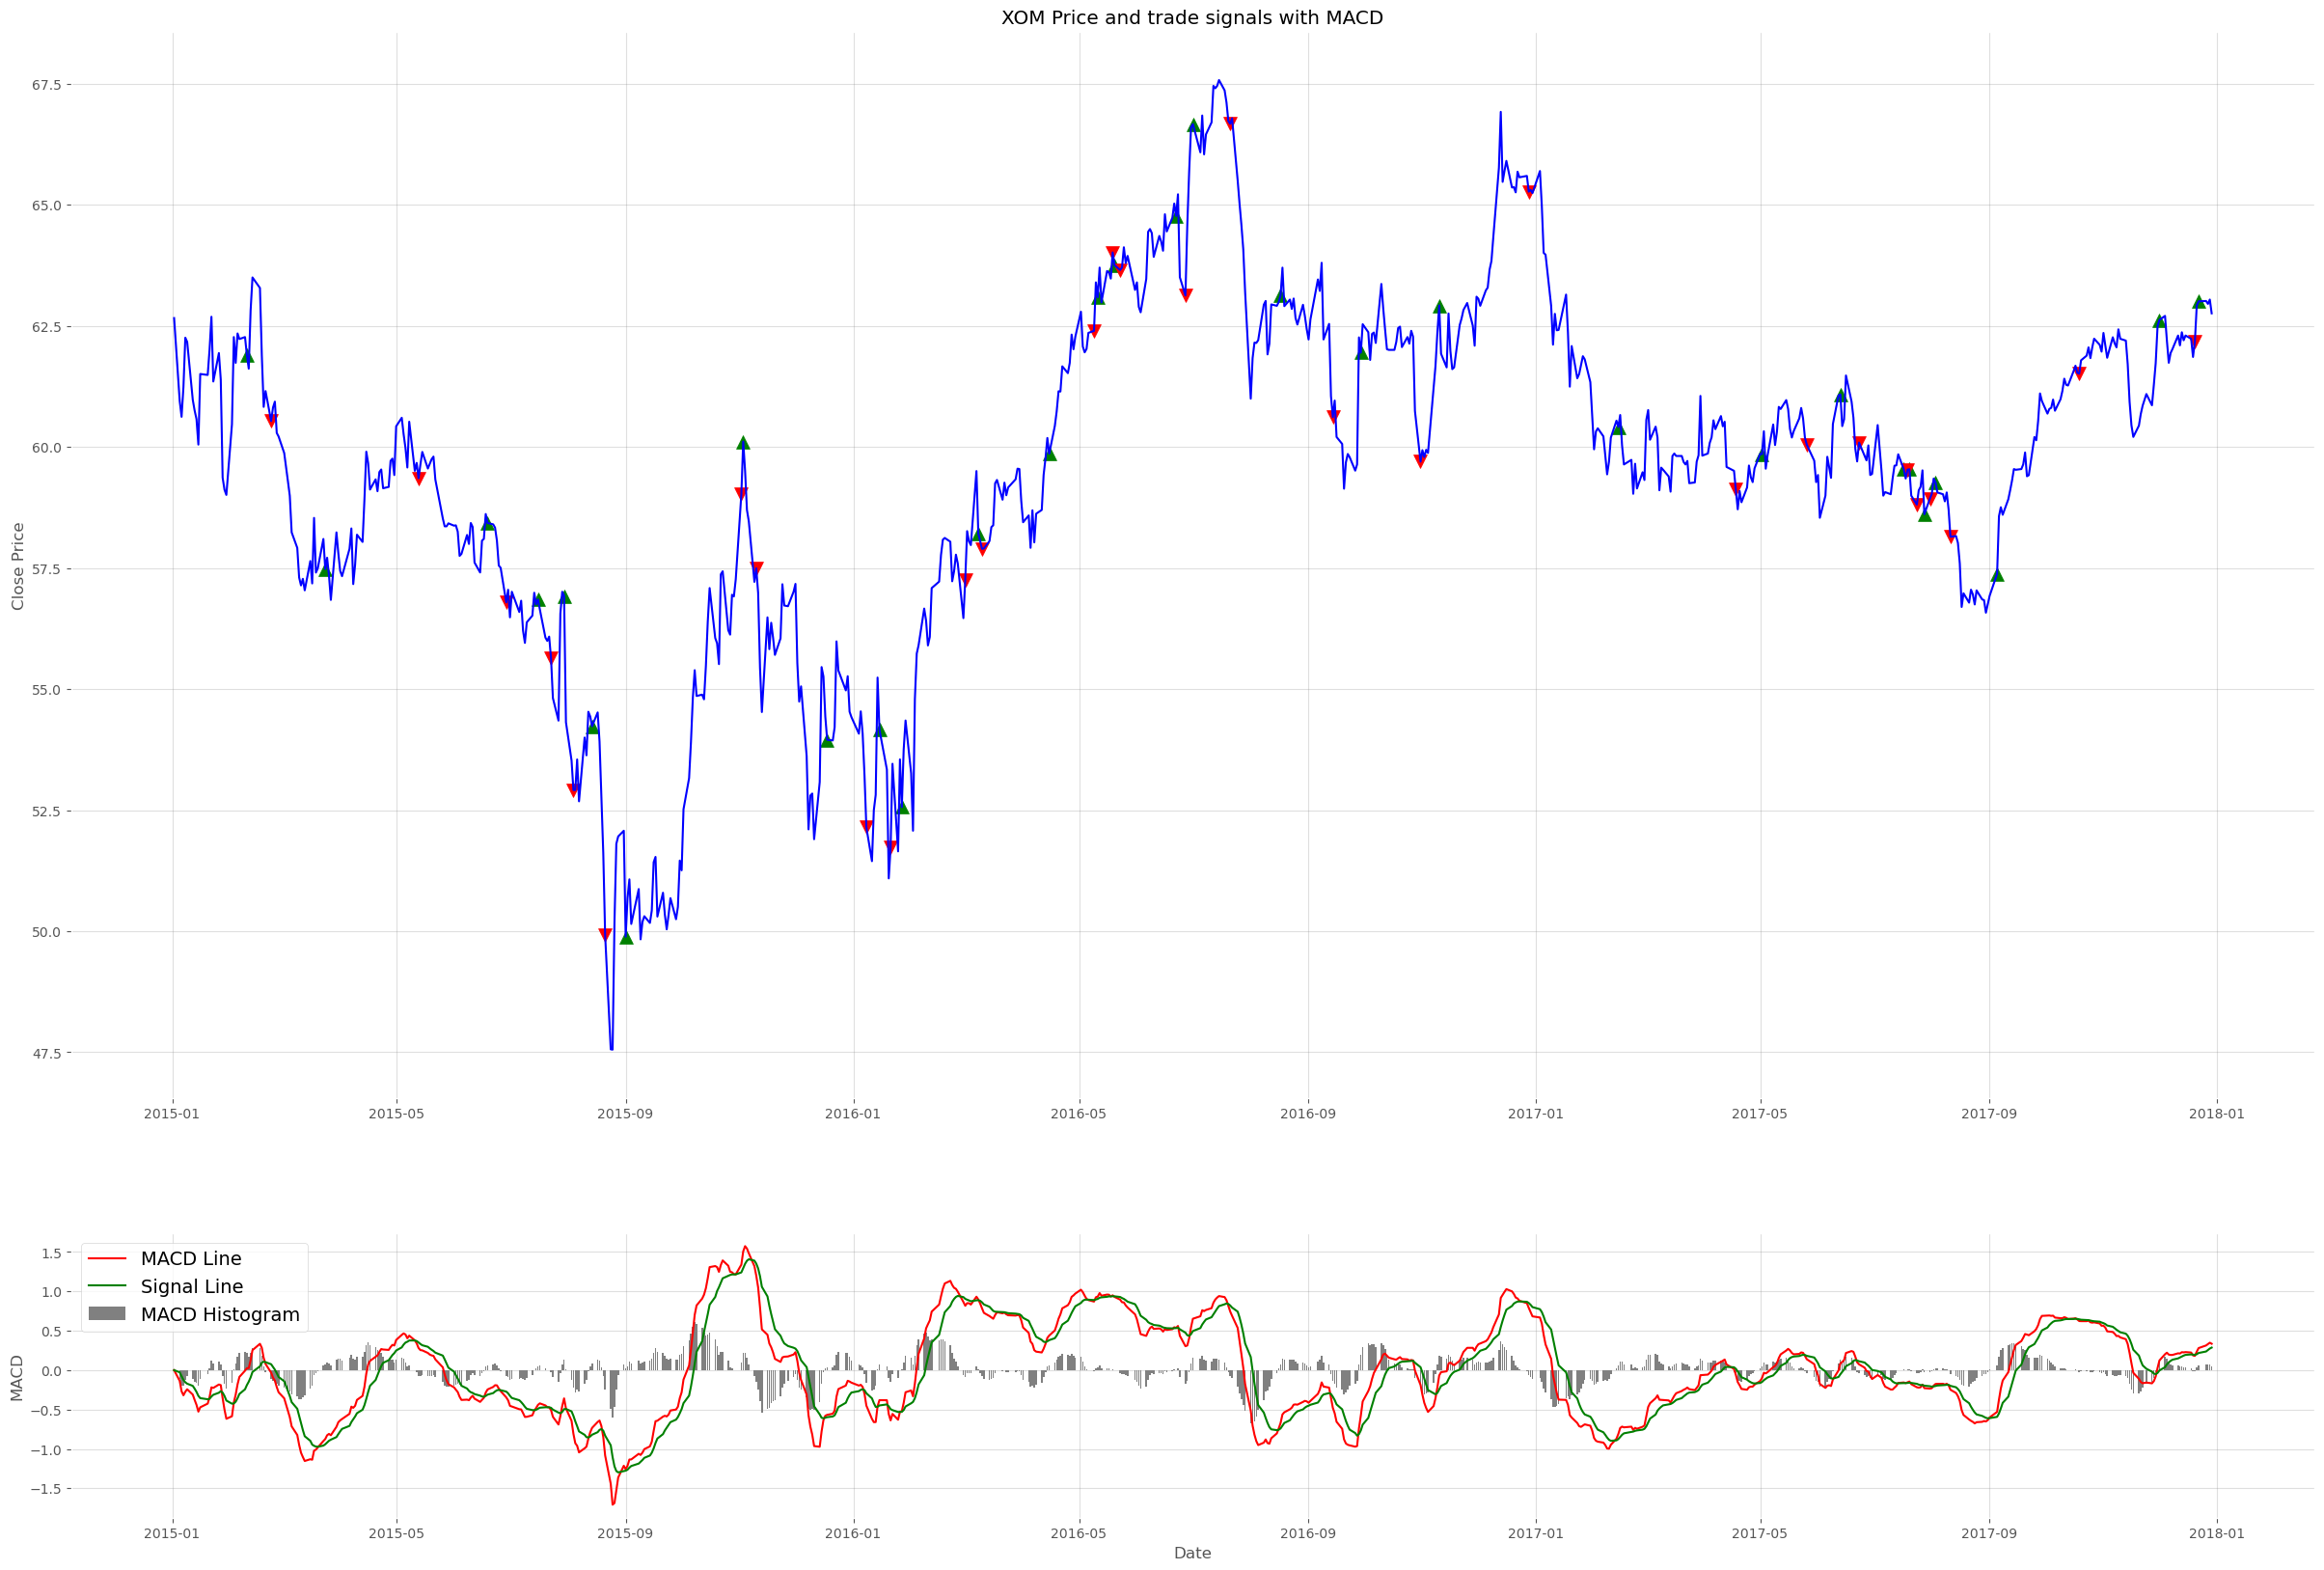

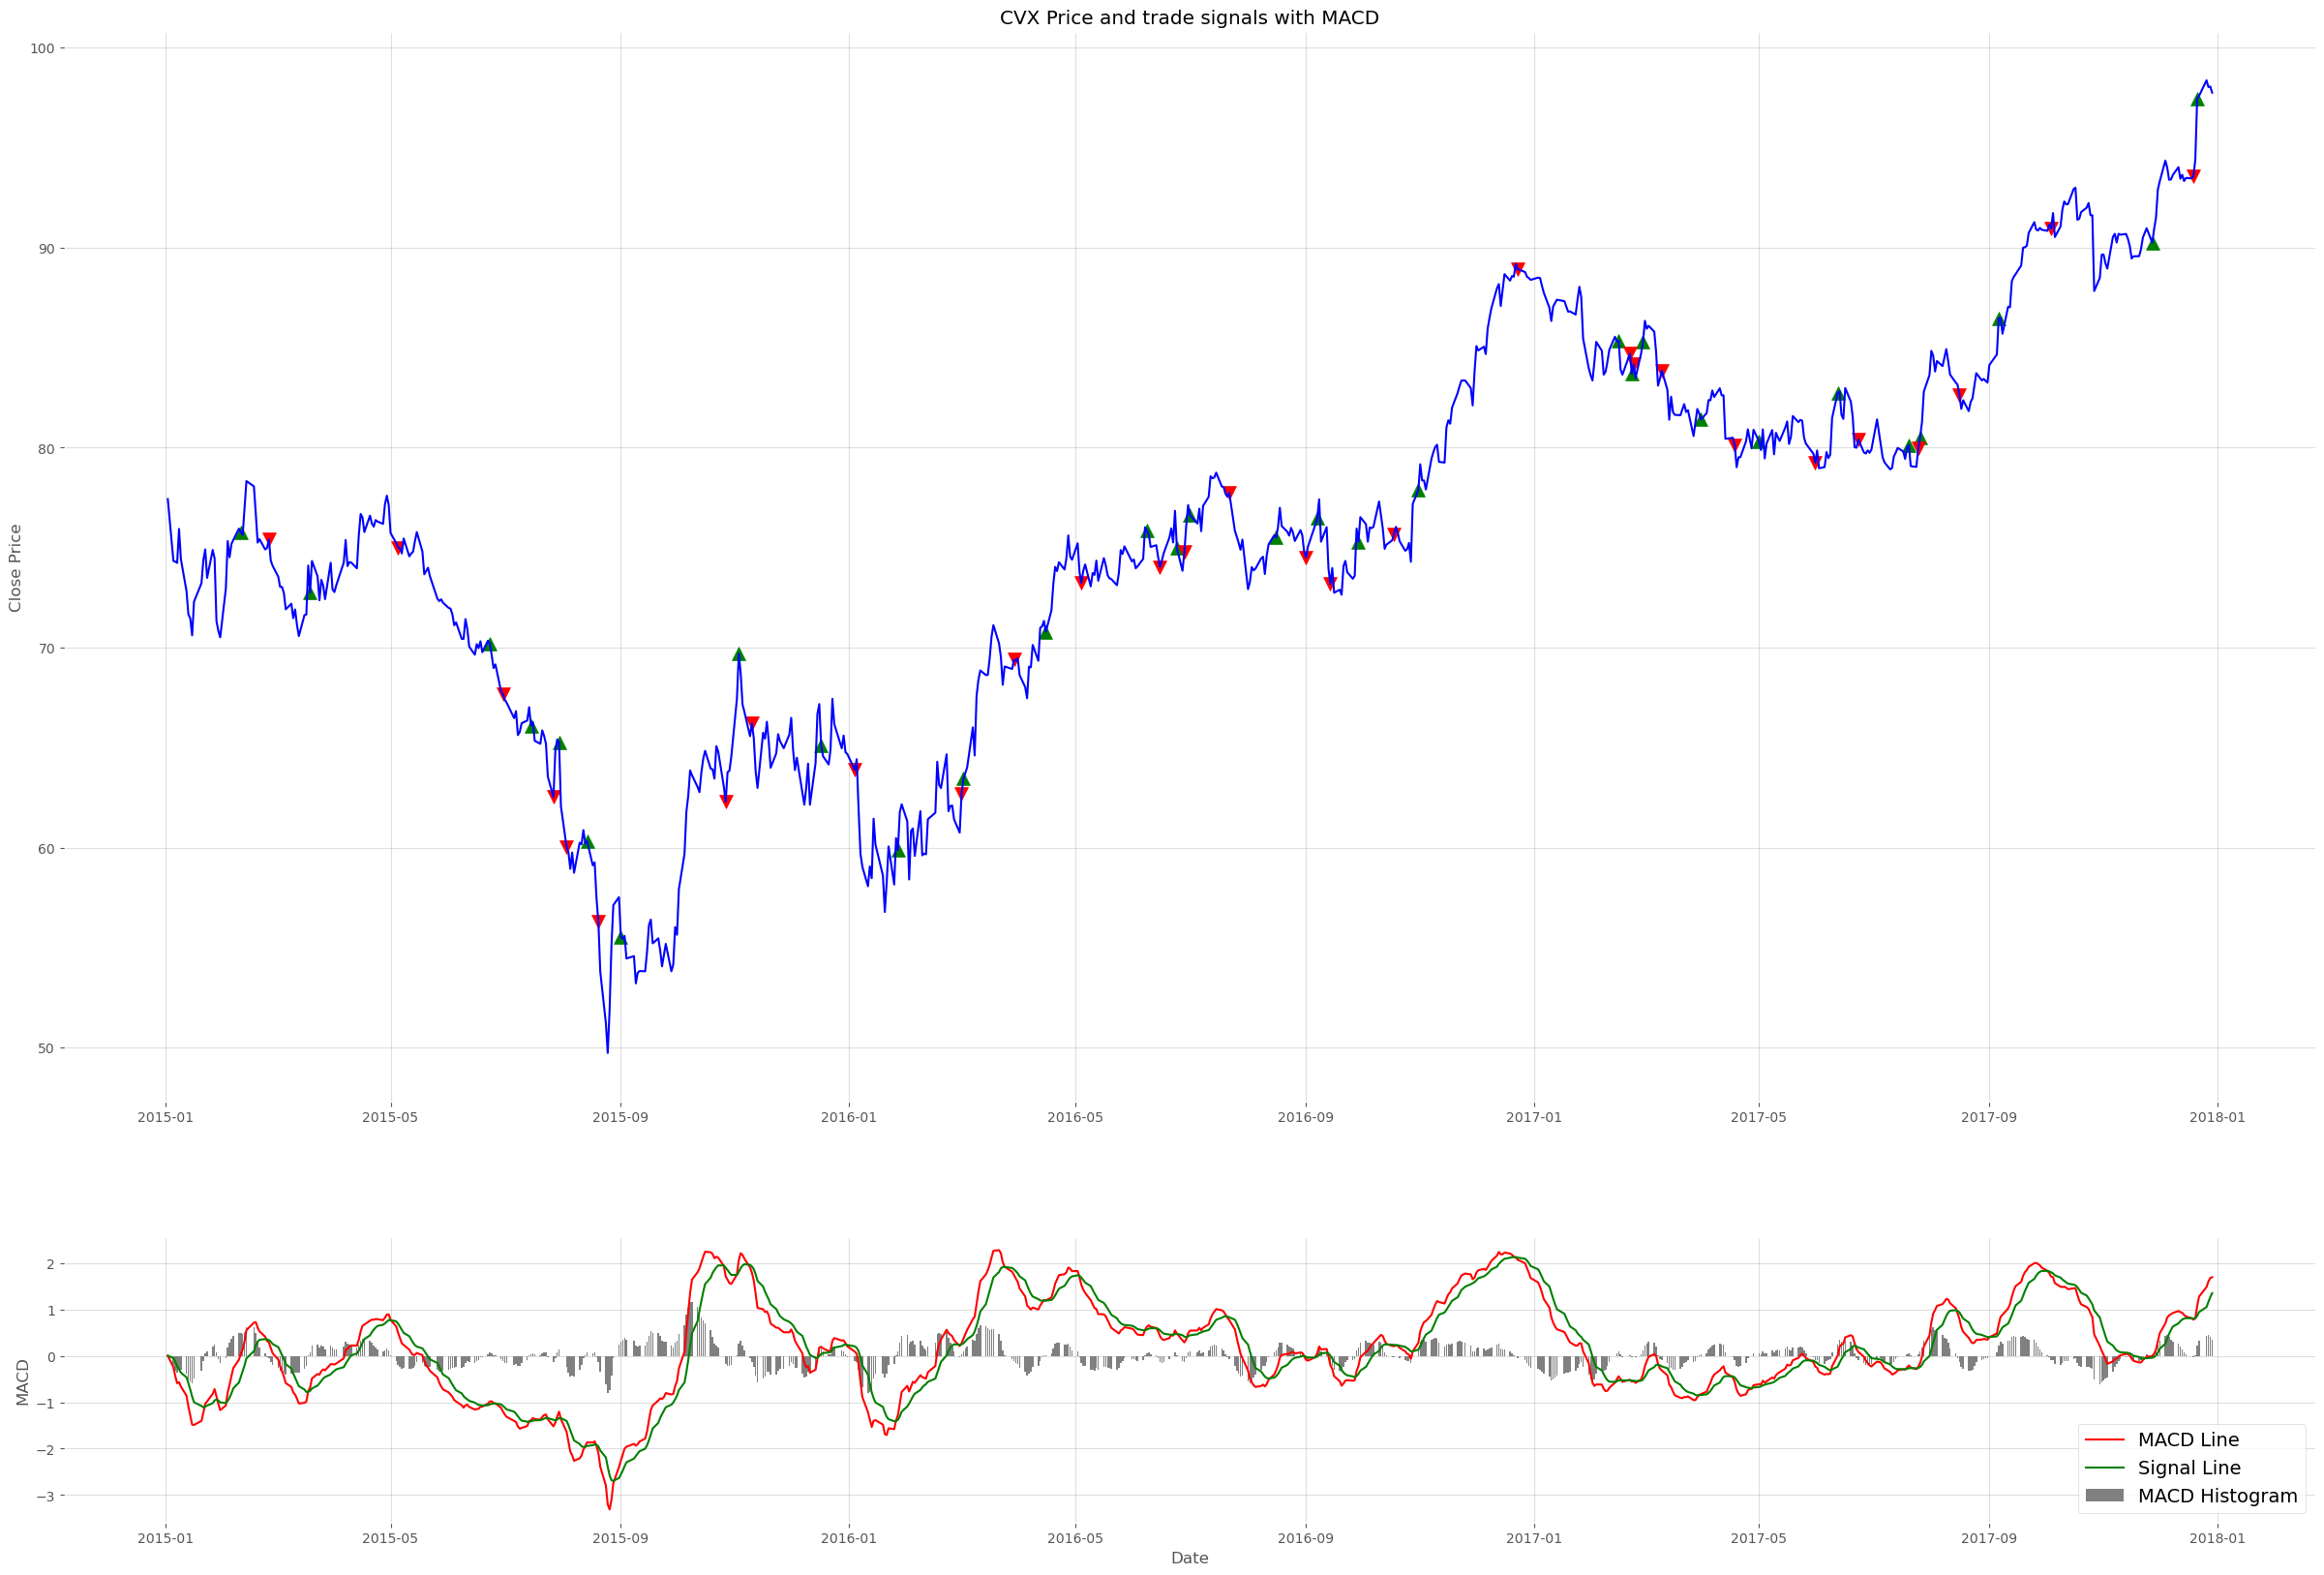

In [31]:
view_MACD_batch(MACD_batch_sig[1:], tickers[1:])

###  <font color = blue> 👉 Question 7. </font> Which of the six stocks performs the best, based on cumulative returns?

### Below are the lines of code that lead to an answer:

In [34]:
def sharpe_MACD_batch(list_of_signals, capital, fee=0):
    sharpe_batch = []
    for signal in list_of_signals:
        sharpe_batch += [(cal_Sharpe(signal, capital, fee=0))]
        
    return sharpe_batch
    

In [35]:
start_capital = 1e5
commission = 5

In [36]:
MACD_portfolios = sharpe_MACD_batch(MACD_batch_sig[:], start_capital, commission)
len(MACD_portfolios)

7

In [37]:
MACD_portfolios[0][0]

,Asset_Rtn,Holding,Adj_Rtn,total,returns
Date,,,,,
2015-01-02,0.000000,0.0,0.000000,100000.000000,0.000000
2015-01-05,-0.028172,0.0,-0.000000,100000.000000,0.000000
2015-01-06,0.000094,0.0,0.000000,100000.000000,0.000000
2015-01-07,0.014022,0.0,0.000000,100000.000000,0.000000
2015-01-08,0.038422,0.0,0.000000,100000.000000,0.000000
...,...,...,...,...,...
2017-12-22,0.000000,1.0,0.000000,188640.675998,0.000000
2017-12-26,-0.025370,1.0,-0.025370,183854.903090,-0.025370
2017-12-27,0.000176,-1.0,-0.000176,183822.576998,-0.000176


In [38]:
for i in range(len(MACD_portfolios)):
    print(MACD_portfolios[i][0]['total'][-1])

185287.5538897442
76119.83902595521
50108.290153126414
36782.20519528931
102993.83582621532
69430.24636463242
84982.31084489792


In [39]:
def MACD_compare(list_of_portfolios, list_of_ticker):
    best_id = 0
    for idx in range(len(list_of_portfolios)):
        if list_of_portfolios[idx][0]['total'][-1] >\
            list_of_portfolios[best_id][0]['total'][-1]:
            best_id = idx
    cum_return = (list_of_portfolios[best_id][0]['total'][-1] /\
                  list_of_portfolios[best_id][0]['total'][0]-1)*100
    return list_of_ticker[best_id], cum_return

In [40]:
MACD_compare(MACD_portfolios[1:], tickers[1:])

('DAL', 2.9938358262153297)

In [41]:
tickers[4]

'DAL'

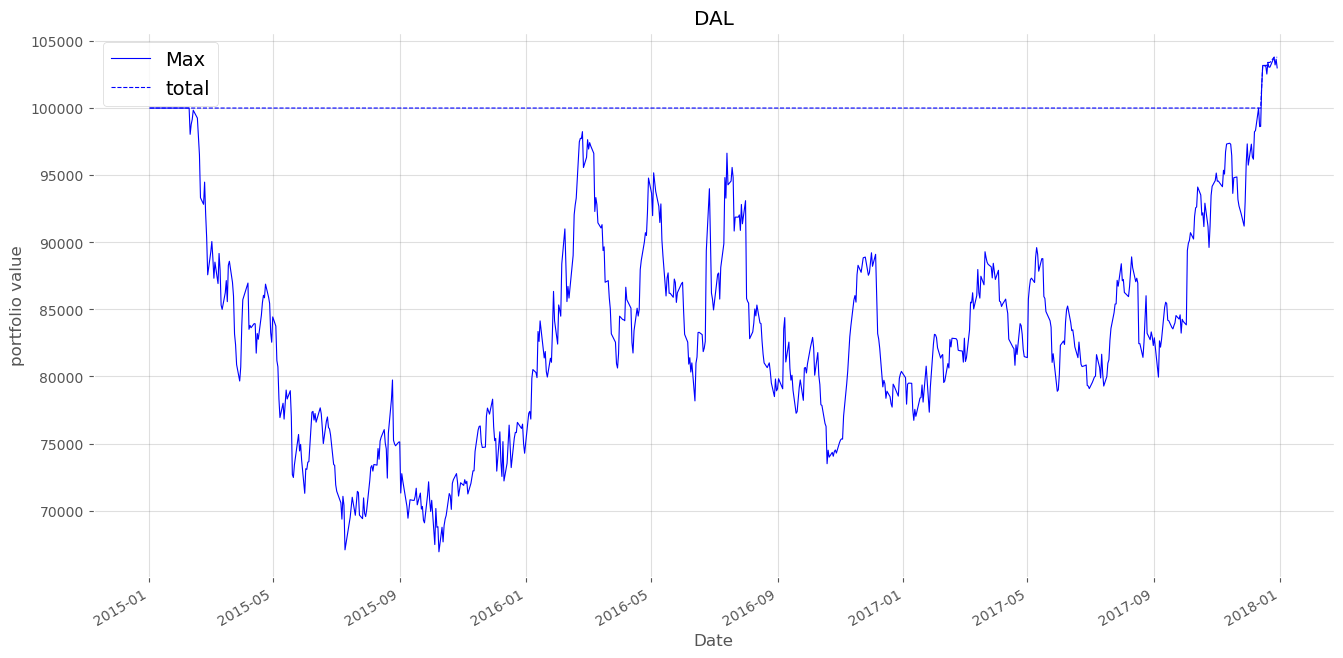

In [42]:
view_MDD(MACD_portfolios[4], tickers[4])

### <font color = red> Answer 7 </font>

    The answer is ________'DAL' with cumulative returns of 2.99%_________________________ .

###  <font color = blue> 👉 Question 8. </font> Which of the stocks displays the worst max drawdown, based on net drawdown % and the number of days?

### Below are the lines of code that lead to an answer:

In [43]:
def DD_matrix(list_of_portfolios, list_of_ticker):
    DD_all = pd.DataFrame()
    for i in range(len(list_of_portfolios)):
        temp_DD = cal_MDD(list_of_portfolios[i][0])[1]
        temp_DD['Asset'] = list_of_ticker[i]
        DD_all = pd.concat([DD_all, temp_DD], ignore_index=True)
        
    return DD_all

In [44]:
DD_all = DD_matrix(MACD_portfolios[1:], tickers[1:])
DD_all

,S/N,DD_start,DD_end,Days,DD_Max,DD%,Asset
0,1,2015-02-10,2015-02-12,2,-566.554021,-0.566554,MSFT
1,2,2015-02-18,2015-02-20,2,-189.990393,-0.183551,MSFT
2,3,2015-02-24,2015-04-24,59,-10398.230817,-9.916095,MSFT
3,4,2015-04-29,2015-06-29,61,-7156.928516,-6.363572,MSFT
4,5,2015-07-01,2015-07-21,20,-3572.936402,-3.103855,MSFT
5,6,2015-07-22,2015-08-04,13,-4751.593086,-4.103217,MSFT
6,7,2015-08-06,2015-08-24,18,-6763.550579,-5.803808,MSFT
7,8,2015-08-26,2015-10-06,41,-10523.553315,-8.540496,MSFT
8,9,2015-10-09,2015-10-16,7,-2031.572398,-1.622782,MSFT
9,10,2015-10-21,2015-10-22,1,-1503.883128,-1.193227,MSFT


In [45]:
DD_rank_days = DD_all.sort_values(by='Days', ascending = False)
DD_rank_days.index = range(1, len(DD_rank_days) + 1)
DD_rank_days.head()

,S/N,DD_start,DD_end,Days,DD_Max,DD%,Asset
1,1,2015-02-10,2017-12-29,1053,-70535.230004,-70.535230,UAL
2,1,2015-02-10,2017-12-14,1038,-33064.065918,-33.064066,DAL
3,9,2015-06-16,2017-12-29,927,-45641.422362,-41.469704,XOM
4,8,2015-06-16,2017-12-29,927,-37931.255751,-34.764039,CVX
5,5,2015-08-25,2017-12-29,857,-75150.590852,-60.424964,AMZN


In [46]:
DD_rank_pct = DD_all.sort_values(by='DD%')
DD_rank_pct.index = range(1, len(DD_rank_pct) + 1)
DD_rank_pct.head()

,S/N,DD_start,DD_end,Days,DD_Max,DD%,Asset
1,1,2015-02-10,2017-12-29,1053,-70535.230004,-70.535230,UAL
2,5,2015-08-25,2017-12-29,857,-75150.590852,-60.424964,AMZN
3,15,2016-01-22,2017-12-29,707,-76191.742477,-51.788923,MSFT
4,9,2015-06-16,2017-12-29,927,-45641.422362,-41.469704,XOM
5,8,2015-06-16,2017-12-29,927,-37931.255751,-34.764039,CVX


### <font color = red> Answer 8 </font>

    The answer is ___________UAL with 900 days of Max Drawdown of -70.54%_______________ .

###  <font color = blue> 👉 Question 9. </font> Looking at each of the six stocks’ annual returns, which year for which stocks shows the best performance?

### Below are the lines of code that lead to an answer:

In [47]:
def annual_perform_matrix(list_of_portfolios, list_of_ticker, list_year_seperation):
    # Define the to be returned DataFrame data as NaN
    data = np.NaN
    # Define your row names and column names
    row_names = []
    for i in range (len(list_year_seperation)-1):
        row_names += ['Year '+ list_year_seperation[i][:4]]
    col_names = list_of_ticker
    # Create the DataFrame
    df = pd.DataFrame(data, index=row_names, columns=col_names)
    
    for i in range(len(df)):
        for j in range(len(list_of_portfolios)):
            year = list_of_portfolios[j][0]\
                    .loc[list_year_seperation[i]:list_year_seperation[i+1]]
            df.iloc[i][list_of_ticker[j]] = \
                (year['total'][-1] / year['total'][0]-1)*100

    return df

In [48]:
year_seperation = ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01']

In [49]:
annual_perform_matrix(MACD_portfolios[1:], tickers[1:], year_seperation)


,MSFT,AMZN,UAL,DAL,XOM,CVX
Year 2015,34.505908,7.294392,-58.085376,-25.719511,-3.882789,-17.865153
Year 2016,-35.773600,-29.286671,-25.306655,4.044892,-27.799441,-0.189956
Year 2017,-12.332545,-29.566213,13.855672,28.893368,1.388210,2.530919


### <font color = red> Answer 9 </font>

    The answer is _______'MSFT' in Year 2015 ____________________________ .

###  <font color = blue> 👉 Question 10. </font> Which of the six stocks make the current strategy investment performance? Please rank the seven stocks based on their annualized Sharpe ratio.

### Below are the lines of code that lead to an answer:

In [50]:
def MACD_sharpe_rank(list_of_portfolios, list_of_ticker):
    # Define the to be returned DataFrame data as NaN
    data = np.NaN
    # Define your row names and column names
    row_names = list_of_ticker
    col_names = ['Sharpe']
    # Create the DataFrame
    df = pd.DataFrame(data, index=row_names, columns=col_names)
    
    for idx in range(len(list_of_portfolios)):
        
        df.loc[list_of_ticker[idx],'Sharpe'] = list_of_portfolios[idx][1]
    df = df.sort_values(by='Sharpe', ascending=False).reset_index()
    df.index = range(1, len(df) + 1)
    return df

In [51]:
MACD_sharpe_rank(MACD_portfolios[:], tickers[:])

,index,Sharpe
1,AAPL,1.047664
2,DAL,0.175135
3,CVX,-0.141959
4,MSFT,-0.318720
5,XOM,-0.601178
6,AMZN,-0.714481
7,UAL,-0.813170


### <font color = red> Answer 10 </font>

    MSFT ______3______
    
    AMZN ______5______

    UAL  ______6______

    DAL  ______1______

    XOM  ______4______
    
    CVX  ______2______

### <font color="green">"💯 Thank you for putting your efforts into the exercise problem sets 😊"</font>